

## Exploratory data analysis

In [1]:
import warnings
from itertools import combinations
from pprint import pprint

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import inv_boxcox, boxcox1p

color = sns.color_palette()

# supress unnecessary warnings for readability and cleaner presentation
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

### Data reading

In this section we will read both train and score data.

In [2]:
ls  # files in folder

CaseStudy2.pdf  MODELING.ipynb  score_data.csv            use_case_data.csv
EDA.ipynb       PMI.pptx        score_data_predicted.csv


In [3]:
# reading data
df_train = pd.read_csv('use_case_data.csv')
df_score = pd.read_csv('score_data.csv')

In [4]:
df_train.head()

REGION   MARKET    BRM   BLDIMAGE     BRANDDIFFERENTIATOR    BRANDFAMILY  \
0  REGION1  MARKET7  BRM36  BLDIMAGE9   BRANDDIFFERENTIATOR98  BRANDFAMILY12   
1  REGION1  MARKET7  BRM37  BLDIMAGE9   BRANDDIFFERENTIATOR98  BRANDFAMILY12   
2  REGION1  MARKET7  BRM38  BLDIMAGE9   BRANDDIFFERENTIATOR98  BRANDFAMILY12   
3  REGION1  MARKET7  BRM58  BLDIMAGE9  BRANDDIFFERENTIATOR267  BRANDFAMILY12   
4  REGION1  MARKET7  BRM73  BLDIMAGE9  BRANDDIFFERENTIATOR467  BRANDFAMILY12   

     BRANDONMARKET    BRANDSUBFAMILY    BRANDSUBFAMILYGROUP  \
0  BRANDONMARKET36  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   
1  BRANDONMARKET37  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   
2  BRANDONMARKET38  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   
3  BRANDONMARKET58  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   
4  BRANDONMARKET73  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   

     BRANDSUBFAMILYGROUPING      ...         PCKT   PRICECLASSON   TCLASS  \
0  BRANDSUBFAMILYGROUPING12      ...       PCKT11  PRICECLASSON2  TCLASS2   
1  BRANDSUBFAMILYGROUPING12      ...       PCKT11  PRICECLASSON2  TCLASS2   
2  BRANDSUBFAMILYGROUPING12      ...       PCKT11  PRICECLASSON2  TCLASS2   
3  BRANDSUBFAMILYGROUPING12      ...       PCKT11  PRICECLASSON2  TCLASS2   
4  BRANDSUBFAMILYGROUPING12      ...       PCKT11  PRICECLASSON2  TCLASS2   

  RETAILPACKPRICE   SPECIALFLAVOR TRCONTE   THICATEGORY   TIPCOLOR  \
0           15.00  SPECIALFLAVOR7    10.0  THICATEGORY4  TIPCOLOR1   
1           19.55  SPECIALFLAVOR7    10.0  THICATEGORY4  TIPCOLOR1   
2           27.00  SPECIALFLAVOR7    10.0  THICATEGORY4  TIPCOLOR1   
3           29.25  SPECIALFLAVOR7     8.0  THICATEGORY4  TIPCOLOR1   
4           15.00  SPECIALFLAVOR7    11.0  THICATEGORY4  TIPCOLOR1   

    TRACKINGSTATUS  Market_Share  
0  TRACKINGSTATUS2      0.001440  
1  TRACKINGSTATUS2      0.002881  
2  TRACKINGSTATUS2      0.028870  
3  TRACKINGSTATUS2      0.018922  
4  TRACKINGSTATUS2      0.000928  

[5 rows x 40 columns]

In [5]:
df_score.head()

REGION   MARKET    BRM   BLDIMAGE     BRANDDIFFERENTIATOR    BRANDFAMILY  \
0  REGION1  MARKET7  BRM36  BLDIMAGE9   BRANDDIFFERENTIATOR98  BRANDFAMILY12   
1  REGION1  MARKET7  BRM37  BLDIMAGE9   BRANDDIFFERENTIATOR98  BRANDFAMILY12   
2  REGION1  MARKET7  BRM38  BLDIMAGE9   BRANDDIFFERENTIATOR98  BRANDFAMILY12   
3  REGION1  MARKET7  BRM58  BLDIMAGE9  BRANDDIFFERENTIATOR267  BRANDFAMILY12   
4  REGION1  MARKET7  BRM73  BLDIMAGE9  BRANDDIFFERENTIATOR467  BRANDFAMILY12   

     BRANDONMARKET    BRANDSUBFAMILY    BRANDSUBFAMILYGROUP  \
0  BRANDONMARKET36  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   
1  BRANDONMARKET37  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   
2  BRANDONMARKET38  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   
3  BRANDONMARKET58  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   
4  BRANDONMARKET73  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   

     BRANDSUBFAMILYGROUPING       ...          NPLLAUNCHYEAR    PCKT  \
0  BRANDSUBFAMILYGROUPING12       ...         NPLLAUNCHYEAR4  PCKT11   
1  BRANDSUBFAMILYGROUPING12       ...         NPLLAUNCHYEAR4  PCKT11   
2  BRANDSUBFAMILYGROUPING12       ...         NPLLAUNCHYEAR7  PCKT11   
3  BRANDSUBFAMILYGROUPING12       ...         NPLLAUNCHYEAR7  PCKT11   
4  BRANDSUBFAMILYGROUPING12       ...         NPLLAUNCHYEAR4  PCKT11   

    PRICECLASSON   TCLASS RETAILPACKPRICE   SPECIALFLAVOR TRCONTE  \
0  PRICECLASSON2  TCLASS2           15.00  SPECIALFLAVOR7      10   
1  PRICECLASSON2  TCLASS2           19.55  SPECIALFLAVOR7      10   
2  PRICECLASSON2  TCLASS2           27.00  SPECIALFLAVOR7      10   
3  PRICECLASSON2  TCLASS2           29.25  SPECIALFLAVOR7       8   
4  PRICECLASSON2  TCLASS2           15.00  SPECIALFLAVOR7      11   

    THICATEGORY   TIPCOLOR   TRACKINGSTATUS  
0  THICATEGORY4  TIPCOLOR1  TRACKINGSTATUS2  
1  THICATEGORY4  TIPCOLOR1  TRACKINGSTATUS2  
2  THICATEGORY4  TIPCOLOR1  TRACKINGSTATUS2  
3  THICATEGORY4  TIPCOLOR1  TRACKINGSTATUS2  
4  THICATEGORY4  TIPCOLOR1  TRACKINGSTATUS2  

[5 rows x 39 columns]

In [6]:
# comparing columns
print('Columns {} are in "df_train" and not in "df_score".'.format(set(df_train.columns) - set(df_score.columns)))
print('Columns {} are in "df_score" and not in "df_train".'.format(set(df_score.columns) - set(df_train.columns)))

Columns {'Market_Share'} are in "df_train" and not in "df_score".
Columns set() are in "df_score" and not in "df_train".


So as we excpected train and score data contain the same columns excpet response variable - Market_Share.

### Data Cleaning & Pre-processing

In this section we will explore features types (Numeric and Categoric) and clean some not useful or duplicate columns.

In [7]:
# checking types of our data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 40 columns):
REGION                    1716 non-null object
MARKET                    1716 non-null object
BRM                       1716 non-null object
BLDIMAGE                  1716 non-null object
BRANDDIFFERENTIATOR       1716 non-null object
BRANDFAMILY               1716 non-null object
BRANDONMARKET             1716 non-null object
BRANDSUBFAMILY            1716 non-null object
BRANDSUBFAMILYGROUP       1716 non-null object
BRANDSUBFAMILYGROUPING    1716 non-null object
BRANDSUBFAMILYLINE        1716 non-null object
CHARINDICATOR             1716 non-null object
BRMID                     1716 non-null int64
INDICATOR                 1716 non-null object
RTYPE                     473 non-null object
INTERNATIONALINDICATOR    1716 non-null object
ISREPLACEMENT             1716 non-null object
ISSTRATEGIC               1716 non-null object
ITEMSHAPE                 804 non-null object
ITE

In [8]:
list(set(df_train.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

We have 40 columns: 39 are our predictors (features) and 1 (Market_Share) is our response (target) variable.

From types of features we see that we have both Numerical and Categorical features.

So we will combine train and score data for properly handling Categorical features (for example one-hot-encoding).

In [9]:
df_train['data_type'] = 'train'
df_score['data_type'] = 'score'

df = pd.concat([df_train.drop(columns=['Market_Share']), df_score])
df.reset_index(inplace=True, drop=True)

In [10]:
not_useful_features = []

#### Numerical features

In [11]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

BRMID  ITEMSCODE  LATESTPERIODINDEX   LEN  NCON  NPLLAUNCHDATE  \
0  60038893         20                 12  84.0   0.0         201110   
1  60040489         26                 12  84.0   0.0         201110   
2  60078730         40                 12  84.0   0.0         201409   
3  60078732         40                 12  84.0   0.0         201409   
4  60038898         20                 12  84.0   0.0         201110   

   RETAILPACKPRICE  TRCONTE  
0            15.00     10.0  
1            19.55     10.0  
2            27.00     10.0  
3            29.25      8.0  
4            15.00     11.0

In [12]:
df_num.describe()

BRMID    ITEMSCODE  LATESTPERIODINDEX          LEN         NCON  \
count  1.745000e+03  1745.000000             1745.0  1745.000000  1745.000000   
mean   5.633265e+07    19.618911               12.0    33.961404     0.334441   
std    4.840959e+06     3.213858                0.0    43.020778     0.452951   
min    5.000239e+07     5.000000               12.0     0.000000     0.000000   
25%    5.007097e+07    20.000000               12.0     0.000000     0.000000   
50%    6.005254e+07    20.000000               12.0     0.000000     0.300000   
75%    6.007422e+07    20.000000               12.0    84.000000     0.600000   
max    6.012768e+07    40.000000               12.0   100.000000    10.000000   

       NPLLAUNCHDATE  RETAILPACKPRICE      TRCONTE  
count    1745.000000      1745.000000  1745.000000  
mean   201196.867049       314.262625     5.406281  
std       226.543530      1416.905866     3.686591  
min    200801.000000         0.000000     0.000000  
25%    201006.000000         4.000000     3.000000  
50%    201206.000000        11.500000     6.000000  
75%    201404.000000        57.000000     8.000000  
max    201603.000000     22000.000000    35.000000

In [13]:
n = len(df_train)
for column in df_num:
    n_unique = len(df_train[column].unique())
    print('feature: {}'.format(column))
    print('unique values: {}'.format(n_unique))
    print('unique values ratio: {}'.format(n_unique / n))
    print('missinge value ratio: {}'.format(df_train[column].isnull().sum() / n))
    print()


feature: BRMID
unique values: 1716
unique values ratio: 1.0
missinge value ratio: 0.0

feature: ITEMSCODE
unique values: 22
unique values ratio: 0.01282051282051282
missinge value ratio: 0.0

feature: LATESTPERIODINDEX
unique values: 1
unique values ratio: 0.0005827505827505828
missinge value ratio: 0.0

feature: LEN
unique values: 28
unique values ratio: 0.016317016317016316
missinge value ratio: 0.0

feature: NCON
unique values: 21
unique values ratio: 0.012237762237762238
missinge value ratio: 0.0

feature: NPLLAUNCHDATE
unique values: 99
unique values ratio: 0.057692307692307696
missinge value ratio: 0.0

feature: RETAILPACKPRICE
unique values: 351
unique values ratio: 0.20454545454545456
missinge value ratio: 0.0

feature: TRCONTE
unique values: 32
unique values ratio: 0.018648018648018648
missinge value ratio: 0.0



**Initial Distribution of features:**

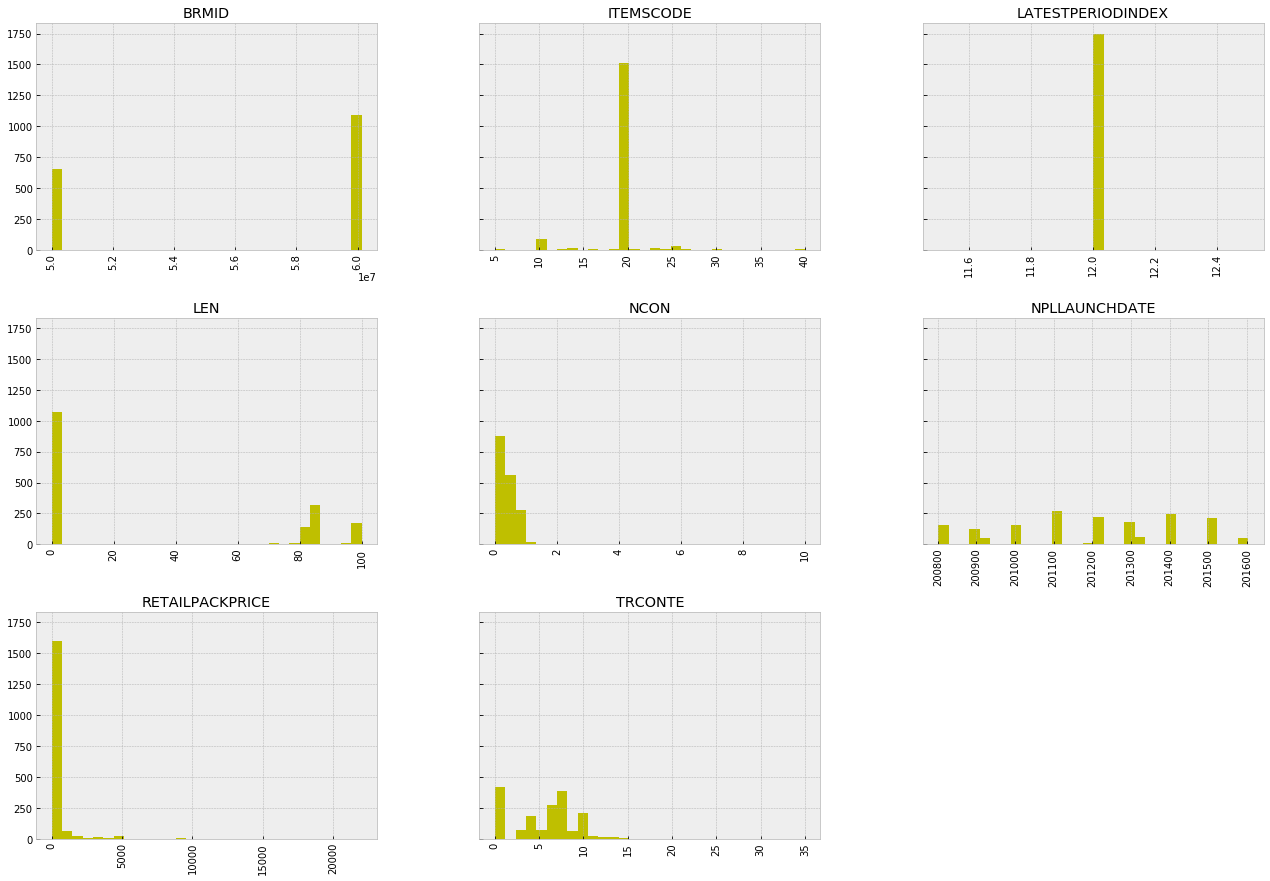

In [14]:
df_num.hist(figsize=(22, 15), facecolor='y', grid=True, xrot=90, sharey=True, bins=30);

**Step-by-step features processing:**

* **BRMID :**  We can see this represents some ID, which is unique for each item. We will not use it.


* **LATESTPERIODINDEX :** As we can see this feature is the same for all items and just informing us that Market_Share numbers are  12 months after launch. We will not use it.


* **ITEMSCODE :** Change to dtype *category*.


* **NPLLAUNCHDATE :** This fetaure represents the year and month of product launch. So this is feature is more categoric than numeric.We will split it into year and month separately and change to dtype *category*.


* The other numerical features: **LEN, NCON, RETAILPACKPRICE, TRCONTE** are numerical and we will keep them as they are at this stage.

In [15]:
# adding to not_useful_features list
not_useful_features.append('BRMID')

# adding to not_useful_features list
not_useful_features.append('LATESTPERIODINDEX')

# changing dtype to category
df['ITEMSCODE'] = df['ITEMSCODE'].astype('category')

# spliting to year and month, adding to not_useful_features list
df['LAUNCH_YEAR'], df['LAUNCH_MONTH'] = df['NPLLAUNCHDATE'].map(str).apply(lambda x: [x[:4], x[4:]]).str
not_useful_features.append('NPLLAUNCHDATE')

#### Categorical features

In [16]:
df_cat = df.select_dtypes(include = ['O', 'category'])
df_cat.head()

REGION   MARKET    BRM   BLDIMAGE     BRANDDIFFERENTIATOR    BRANDFAMILY  \
0  REGION1  MARKET7  BRM36  BLDIMAGE9   BRANDDIFFERENTIATOR98  BRANDFAMILY12   
1  REGION1  MARKET7  BRM37  BLDIMAGE9   BRANDDIFFERENTIATOR98  BRANDFAMILY12   
2  REGION1  MARKET7  BRM38  BLDIMAGE9   BRANDDIFFERENTIATOR98  BRANDFAMILY12   
3  REGION1  MARKET7  BRM58  BLDIMAGE9  BRANDDIFFERENTIATOR267  BRANDFAMILY12   
4  REGION1  MARKET7  BRM73  BLDIMAGE9  BRANDDIFFERENTIATOR467  BRANDFAMILY12   

     BRANDONMARKET    BRANDSUBFAMILY    BRANDSUBFAMILYGROUP  \
0  BRANDONMARKET36  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   
1  BRANDONMARKET37  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   
2  BRANDONMARKET38  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   
3  BRANDONMARKET58  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   
4  BRANDONMARKET73  BRANDSUBFAMILY12  BRANDSUBFAMILYGROUP12   

     BRANDSUBFAMILYGROUPING     ...         PCKT   PRICECLASSON   TCLASS  \
0  BRANDSUBFAMILYGROUPING12     ...       PCKT11  PRICECLASSON2  TCLASS2   
1  BRANDSUBFAMILYGROUPING12     ...       PCKT11  PRICECLASSON2  TCLASS2   
2  BRANDSUBFAMILYGROUPING12     ...       PCKT11  PRICECLASSON2  TCLASS2   
3  BRANDSUBFAMILYGROUPING12     ...       PCKT11  PRICECLASSON2  TCLASS2   
4  BRANDSUBFAMILYGROUPING12     ...       PCKT11  PRICECLASSON2  TCLASS2   

    SPECIALFLAVOR   THICATEGORY   TIPCOLOR   TRACKINGSTATUS data_type  \
0  SPECIALFLAVOR7  THICATEGORY4  TIPCOLOR1  TRACKINGSTATUS2     train   
1  SPECIALFLAVOR7  THICATEGORY4  TIPCOLOR1  TRACKINGSTATUS2     train   
2  SPECIALFLAVOR7  THICATEGORY4  TIPCOLOR1  TRACKINGSTATUS2     train   
3  SPECIALFLAVOR7  THICATEGORY4  TIPCOLOR1  TRACKINGSTATUS2     train   
4  SPECIALFLAVOR7  THICATEGORY4  TIPCOLOR1  TRACKINGSTATUS2     train   

  LAUNCH_YEAR LAUNCH_MONTH  
0        2011           10  
1        2011           10  
2        2014           09  
3        2014           09  
4        2011           10  

[5 rows x 35 columns]

* Lets check all categorical features.

In [17]:
feature_unique_values = {}
n = len(df_cat)
for column in df_cat:
    if column == 'data_type':
        continue   
    
    n_unique = len(df_cat[column].unique())
    feature_unique_values[column] = n_unique
    print('feature: {}'.format(column))
    print('unique values: {}'.format(n_unique))
    print('cardinality ratio: {}'.format(n_unique / n))
    print('missinge value ratio: {}'.format(df_cat[column].isnull().sum() / n))
    print()

feature: REGION
unique values: 4
cardinality ratio: 0.002292263610315186
missinge value ratio: 0.0

feature: MARKET
unique values: 115
cardinality ratio: 0.0659025787965616
missinge value ratio: 0.0

feature: BRM
unique values: 1099
cardinality ratio: 0.6297994269340974
missinge value ratio: 0.0

feature: BLDIMAGE
unique values: 8
cardinality ratio: 0.004584527220630372
missinge value ratio: 0.0

feature: BRANDDIFFERENTIATOR
unique values: 584
cardinality ratio: 0.3346704871060172
missinge value ratio: 0.0

feature: BRANDFAMILY
unique values: 71
cardinality ratio: 0.040687679083094556
missinge value ratio: 0.0

feature: BRANDONMARKET
unique values: 1099
cardinality ratio: 0.6297994269340974
missinge value ratio: 0.0

feature: BRANDSUBFAMILY
unique values: 125
cardinality ratio: 0.07163323782234957
missinge value ratio: 0.0

feature: BRANDSUBFAMILYGROUP
unique values: 75
cardinality ratio: 0.04297994269340974
missinge value ratio: 0.0

feature: BRANDSUBFAMILYGROUPING
unique values: 125


**Step-by-step features processing:**

* **ISREPLACEMENT :** This feature value is the same for all items, so we will not use it.



* We can see that there are some features, which have the same count of unique values. These features are possible duplicate features. We will check it with the following logic: 2 features will be considered as the same, if they have *unique* mapping, aka *to each value from f_1 corresponds only one value from f_2 and vice versa*. 

In [18]:
# adding to not_useful_features list
not_useful_features.append('ISREPLACEMENT')

In [19]:
# finding possible duplicates
possible_duplicates = {}
for x in list(set(feature_unique_values.values())):
    temp = [k for k, v in feature_unique_values.items() if v == x]
    if len(temp) > 1:
        possible_duplicates[x] = temp

pprint(possible_duplicates, width=100)

{2: ['CHARINDICATOR', 'ISSTRATEGIC', 'ITEMSHAPE', 'MINDICATOR', 'TRACKINGSTATUS'],
 3: ['INDICATOR', 'INTERNATIONALINDICATOR'],
 4: ['REGION', 'TCLASS'],
 5: ['RTYPE', 'LENCATEGORY', 'PRICECLASSON', 'THICATEGORY'],
 8: ['BLDIMAGE', 'SPECIALFLAVOR', 'TIPCOLOR'],
 9: ['NPLLAUNCHYEAR', 'LAUNCH_YEAR'],
 12: ['LOCALCLASS', 'LAUNCH_MONTH'],
 22: ['ITEMSCODE', 'PRICECLASS'],
 125: ['BRANDSUBFAMILY', 'BRANDSUBFAMILYGROUPING'],
 1099: ['BRM', 'BRANDONMARKET', 'MARKETEDBRAND']}


In [20]:
# helper function for investigating duplicate features
def is_the_same_feature(data: pd.DataFrame, f_1: str, f_2: str) -> bool:
    """
    Return True, if 2 features are the same in given DataFrame. 
    2 features will be considered as the same, if they have unique mapping,
    aka for each value from f_1 there is only one value from f_2 and vice versa.  
    """
    unique_pairs_df = data.groupby([f_1,  f_2]).size().reset_index().rename(columns={0:'count'})
    n_unique_pairs = unique_pairs_df.shape[0]
    
    f_1_unique_values = unique_pairs_df[f_1].unique().shape[0]
    f_2_unique_values = unique_pairs_df[f_2].unique().shape[0]
    return f_1_unique_values == f_2_unique_values == n_unique_pairs 

# checking all possible_duplicates
duplicate_features = []
for v in possible_duplicates.values():
    all_possible_pairs = list(combinations(v, 2))
    for (f_1, f_2) in all_possible_pairs:
        if is_the_same_feature(df_cat, f_1, f_2):
            print('features {} and {} are the same'.format(f_1, f_2))
            duplicate_features.append((f_1, f_2))

features NPLLAUNCHYEAR and LAUNCH_YEAR are the same
features BRM and BRANDONMARKET are the same
features BRM and MARKETEDBRAND are the same
features BRANDONMARKET and MARKETEDBRAND are the same
features BRANDSUBFAMILY and BRANDSUBFAMILYGROUPING are the same


* **NPLLAUNCHYEAR, LAUNCH_YEAR :** These features are the same, so we will keep only one of them.


* **BRM, BRANDONMARKET, MARKETEDBRAND :** These features are the same, so we will keep only one of them.


* **BRANDSUBFAMILY, BRANDSUBFAMILYGROUPING :** These features are the same, so we will keep only one of them.

In [21]:
# we will keep only one from the duplicate features
not_useful_features.extend(['BRM', 'MARKETEDBRAND', 'BRANDSUBFAMILY', 'NPLLAUNCHYEAR'])

In [22]:
del df_cat, df_num  # these dfs were created only for analysis, so now we can remove them

We finished with features cleaning from not useful ones. Now we will move to missing values.

#### Missing values

In [23]:
# features with missing values
columns_na = (df.isnull().sum() / df.shape[0]) * 100
columns_na = columns_na.drop(columns_na[columns_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': columns_na})
missing_data.head(20)

Missing Ratio
RTYPE              72.779370
SPECIALFLAVOR      60.687679
ITEMSHAPE          53.123209
TIPCOLOR           48.997135

Text(0.5, 1.0, 'Percent missing data by feature')

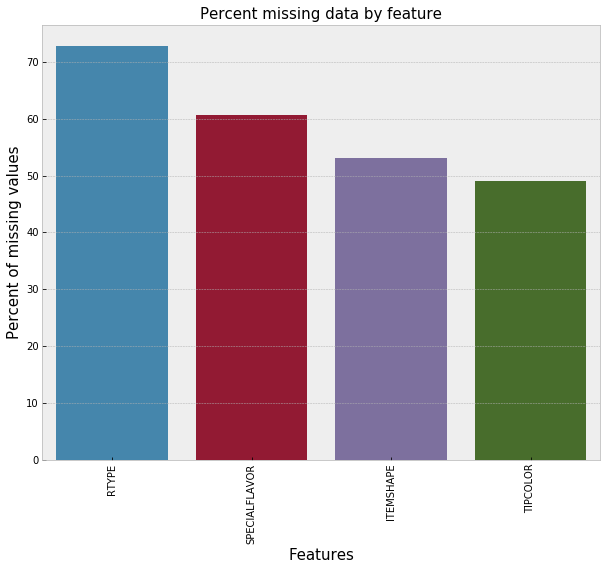

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=columns_na.index, y=columns_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

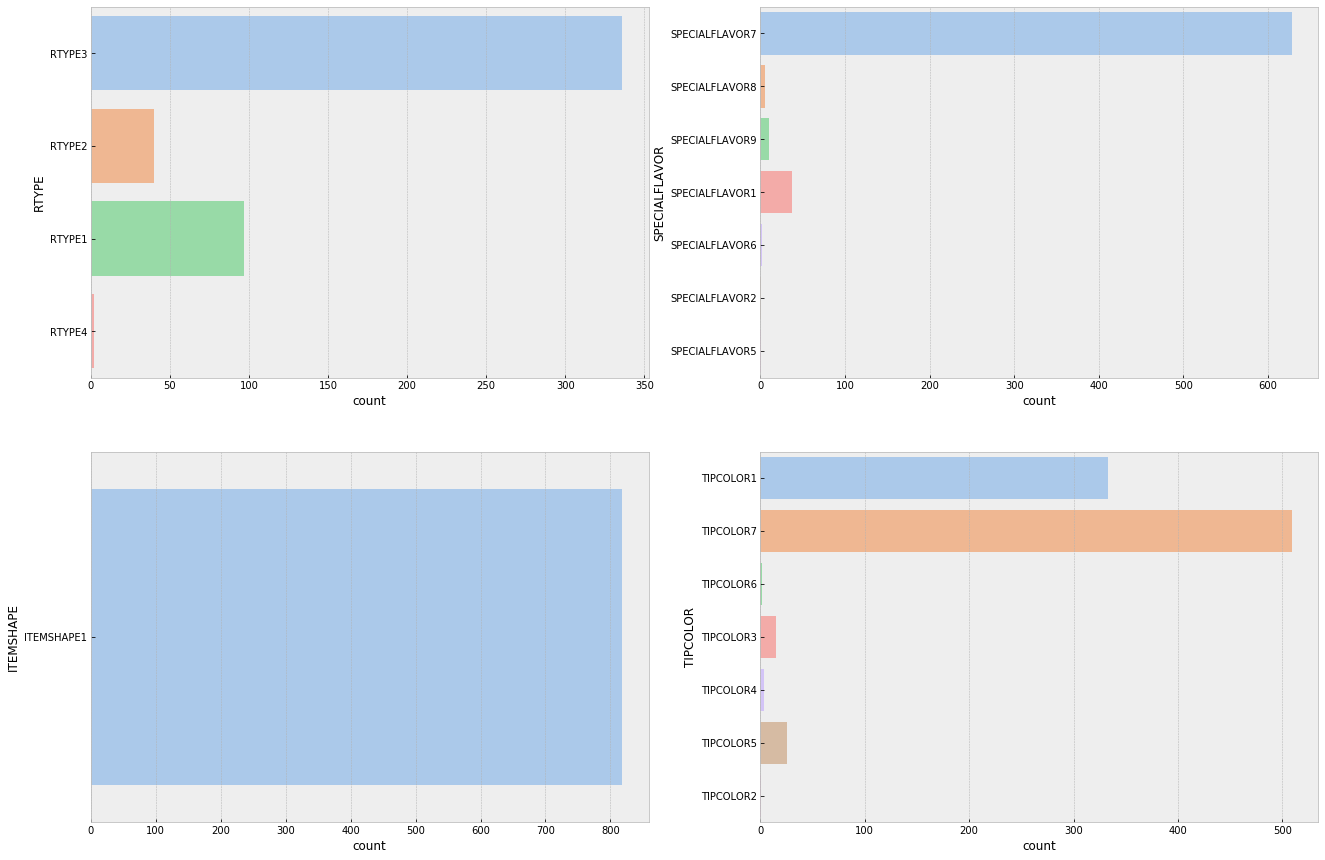

In [25]:
f, ax = plt.subplots(2,2, figsize = (22,15))
cols = columns_na.index
k = 0
for i in range(2):
    for j in range(2):
        sns.countplot(y=cols[k], palette="pastel", data=df[cols], ax=ax[i][j]);
        k += 1


**Inputing missing values**

We impute them by proceeding sequentially through features with missing values.

-   **RTYPE** : As we do not have any idea, what does it mean this feature and it's missing percentage is quite high, we will not use it.


-   **SPECIALFLAVOR** : We assume that missing value of this feature, means that product does not have special flavor, so it is one additional category.


-   **ITEMSHAPE** : Missing values of this feature is most probably means that data was not avialable, so we will not use it.



-   **TIPCOLOR** : We assume that missing value of this feature, means that product does not have tip color, so it is one additional category.

In [26]:
not_useful_features.extend(['RTYPE', 'ITEMSHAPE'])

df['SPECIALFLAVOR'].fillna('NOSPECIALFLAVOR', inplace=True)  # filling missing values
df['TIPCOLOR'].fillna('NOTIPCOLOR', inplace=True)  # filling missing values

In [27]:
# removing not useful features 
df.drop(columns=not_useful_features, inplace=True)
print('final number of features: {}'.format(len(df.columns) - 1))  # -1 i for "data_type" -> train or score

# checking that there is no any missing columns
assert not np.all(df.isnull())

final number of features: 31


 Now will move to visulations in order to get some insights about distributions, correlations, ...

### Numerical data distribution

In [28]:
df_num = df[df['data_type'] == 'train'] 
df_num['Market_Share'] = df_train['Market_Share']
df_num = df_num.select_dtypes(include=['float64'])

In [29]:
df_num.head(3)

LEN  NCON  RETAILPACKPRICE  TRCONTE  Market_Share
0  84.0   0.0            15.00     10.0      0.001440
1  84.0   0.0            19.55     10.0      0.002881
2  84.0   0.0            27.00     10.0      0.028870

#### Response variable: Market_Share distribution

First lets check our data agianst Succcess and Failure

In [30]:
threshold = 0.007
success_ratio = (df_num['Market_Share'] > threshold).sum() / len(df_num)
print('Success / Failure: {:.2f} / {:.2f}'.format(success_ratio, 1 - success_ratio))

Success / Failure: 0.19 / 0.81


So our dataset is imbalanced in terms of classfication, because our classes frequency in dataset is very different.

skew     7.505464842142647
count    1716.000000
mean        0.004652
std         0.008118
min        -0.000419
25%         0.000862
50%         0.002299
75%         0.005167
max         0.146897
Name: Market_Share, dtype: float64


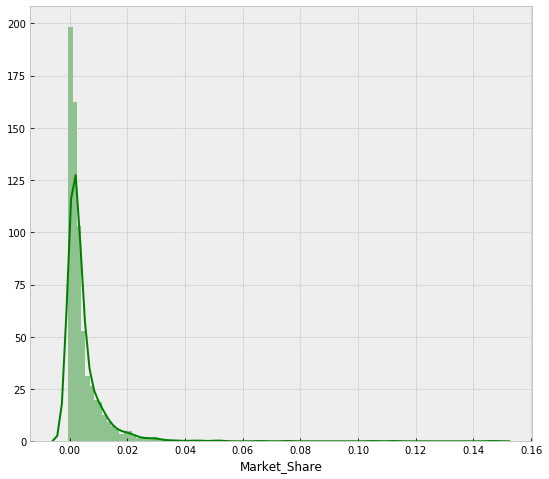

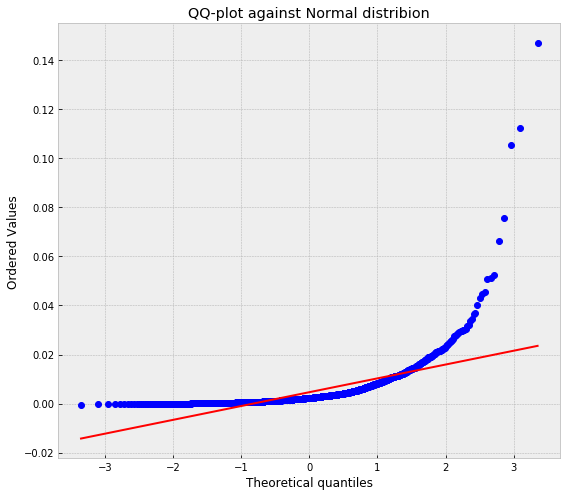

In [31]:
print('skew    ', df_num['Market_Share'].skew())
print(df_num['Market_Share'].describe())

# Market Share distribution
plt.figure(figsize=(9, 8))
sns.distplot(df_num['Market_Share'], color='g', bins=100, hist_kws={'alpha': 0.4}) 

# Get also the QQ-plot
fig = plt.figure(figsize=(9, 8))
res = stats.probplot(df_num['Market_Share'], plot=plt, dist='norm',)
plt.title('QQ-plot against Normal distribion')
plt.show()

**Some insights:**

*  There are some values, which are **negative**. This can not be in reality, because our data is describing product Market Share, which can not be negative. Minimum possible value is 0. So we should remove these items from data.


*  Data has the shape of **Exponential** distribution. As (linear) models love **normally** distributed data , we need to transform this variable and make it more normally distributed.

    

In [32]:
# removeing negative values
df_num = df_num[df_num['Market_Share'] >= 0]

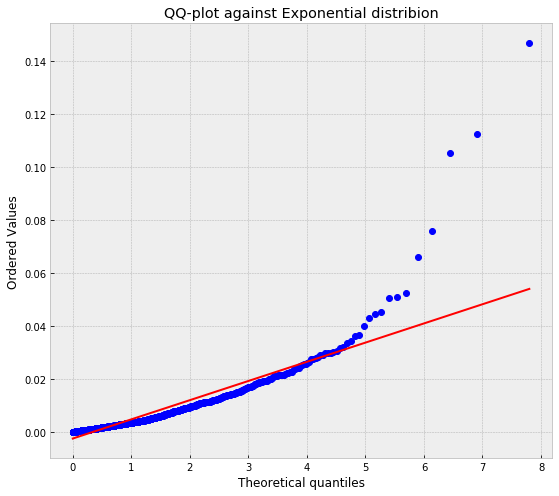

In [33]:
fig = plt.figure(figsize=(9, 8))
res = stats.probplot(df_num['Market_Share'], plot=plt, dist='expon')
plt.title('QQ-plot against Exponential distribion')
plt.show()

*  We can see that there are some **outliers** also (> 0.06). We will handle them, when creating models.

**BoxCox-transformation of the response variable for making it more normally distributed:**

skew     0.35200281817161694

 mu = -3.10 and sigma = 0.31



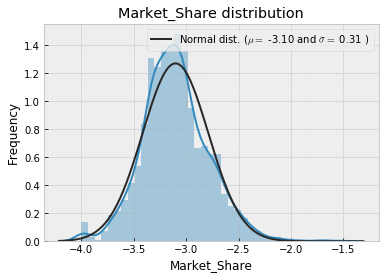

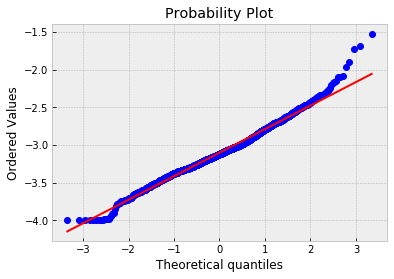

In [34]:
# we will use BoxCox from scipy with lambda = 0.25
# we add very small number to Market_Share for cut it zrom 0 
lmbda = 0.25
df_num['Market_Share'] = stats.boxcox(df_num['Market_Share'] + 1e-50, lmbda=lmbda)  
print('skew    ', df_num['Market_Share'].skew())

# check the new distribution 
sns.distplot(df_num['Market_Share'] , fit=stats.norm);

# get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df_num['Market_Share'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Market_Share distribution')

# get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_num['Market_Share'], plot=plt)
plt.show()

*  Now data is more normally distributed.

#### Numeric features distribution

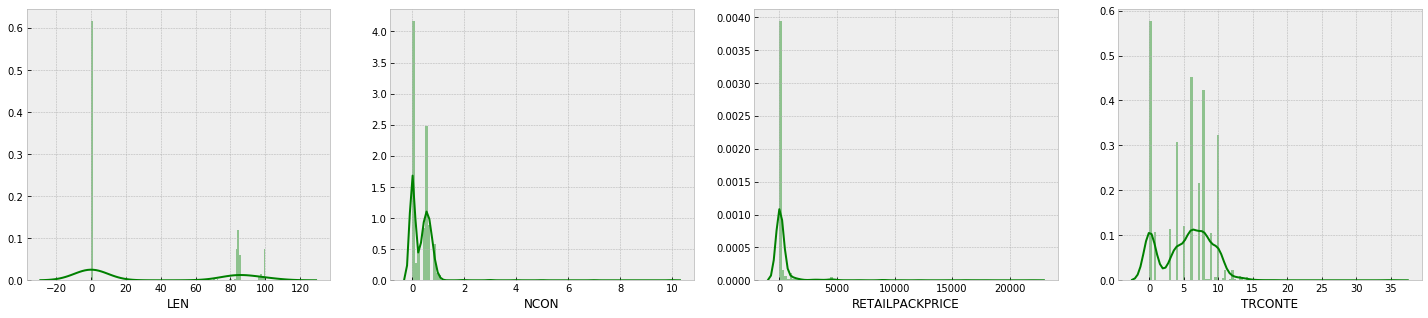

LEN                0.510686
NCON               8.750785
RETAILPACKPRICE    8.527337
TRCONTE            0.162301
Market_Share       0.352003
dtype: float64


In [35]:
fig, ax = plt.subplots(1, 4, **{'figsize': (25, 5)})
for i in range(4):
    c = df_num.columns[i]
    sns.distplot(df_num[c], ax=ax[i], color='g', bins=100, hist_kws={'alpha': 0.4}) 
plt.show()

print(df_num.skew())

We can see that **NCON** and **RETAILPACKPRICE** have quite big skew. **LEN** is also skewed. So we will transform these features with BoxCox in order to have less skew.

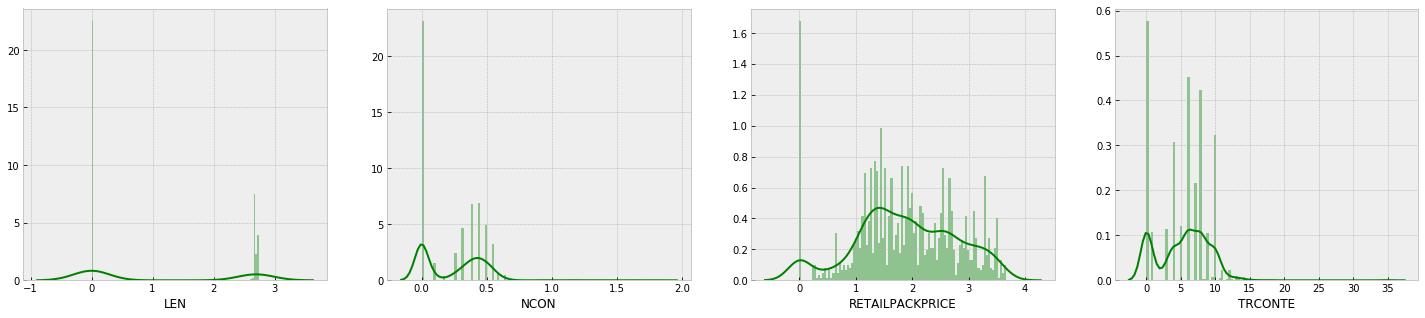

LEN                0.474663
NCON               0.564668
RETAILPACKPRICE   -0.151020
TRCONTE            0.162301
Market_Share       0.352003
dtype: float64


In [36]:
# we will use boxcox1p - ((1+x)**lmbda - 1) / lmbda with lmbda = -0.25 (we need because some values are 0)
df_num[['RETAILPACKPRICE', 'NCON', 'LEN']] = boxcox1p(df_num[['RETAILPACKPRICE', 'NCON', 'LEN']], -0.25)

fig, ax = plt.subplots(1, 4, **{'figsize': (25, 5)})
for i in range(4):
    c = df_num.columns[i]
    sns.distplot(df_num[c], ax=ax[i], color='g', bins=100, hist_kws={'alpha': 0.4}) 
plt.show()

print(df_num.skew())

Now we can see that more or less or variables have small skew (< 0.5).

#### Correlations between numerical variables

In [37]:
correlation = df_num.corr()
print(correlation['Market_Share'].sort_values(ascending = False),'\n')

Market_Share       1.000000
NCON              -0.048636
TRCONTE           -0.060732
RETAILPACKPRICE   -0.065654
LEN               -0.131731
Name: Market_Share, dtype: float64 



* We can see that there is no string correlation.

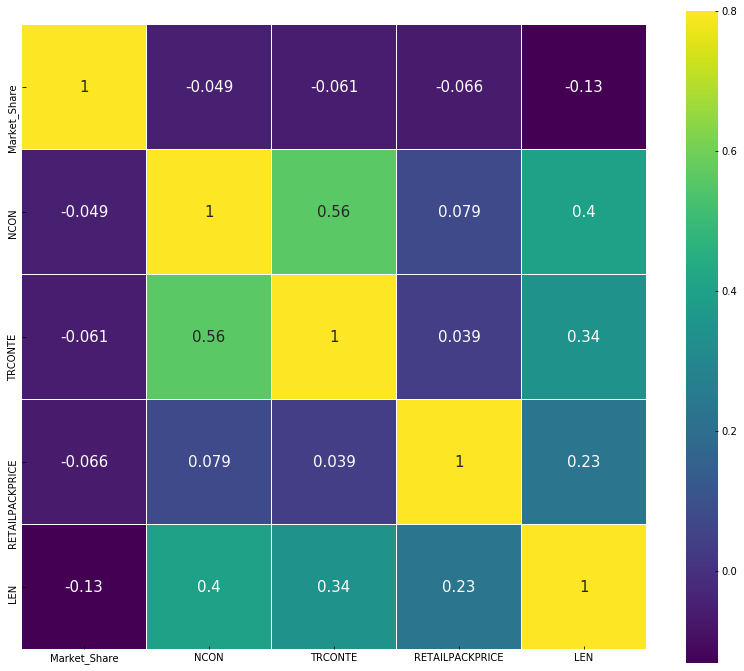

In [38]:
k = 5
cols = correlation.nlargest(k, 'Market_Share')['Market_Share'].index
cm = np.corrcoef(df_num[cols].values.T)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor="white", xticklabels=cols.values, annot_kws={'size': 15}, yticklabels=cols.values);

* We can see that there is no linear reltaionship between features and response variable.

In [39]:
# adding Success and Failure
threshold = 0.007
threshold_transformed = stats.boxcox(0.007, lmbda=lmbda)  # we have to transform threshold also
print(threshold_transformed)


df_num['S/F'] = df_num['Market_Share'] > threshold_transformed
df_num.loc[df_num['S/F'] == True, 'S/F'] = 'S'
df_num.loc[df_num['S/F'] == False, 'S/F'] = 'F'

-2.8429969565923687


In [40]:
df_num.head()

LEN  NCON  RETAILPACKPRICE  TRCONTE  Market_Share S/F
0  2.682638   0.0         2.000000     10.0     -3.220851   F
1  2.682638   0.0         2.121302     10.0     -3.073306   F
2  2.682638   0.0         2.261117     10.0     -2.351182   S
3  2.682638   0.0         2.294394      8.0     -2.516460   S
4  2.682638   0.0         2.000000     11.0     -3.301848   F

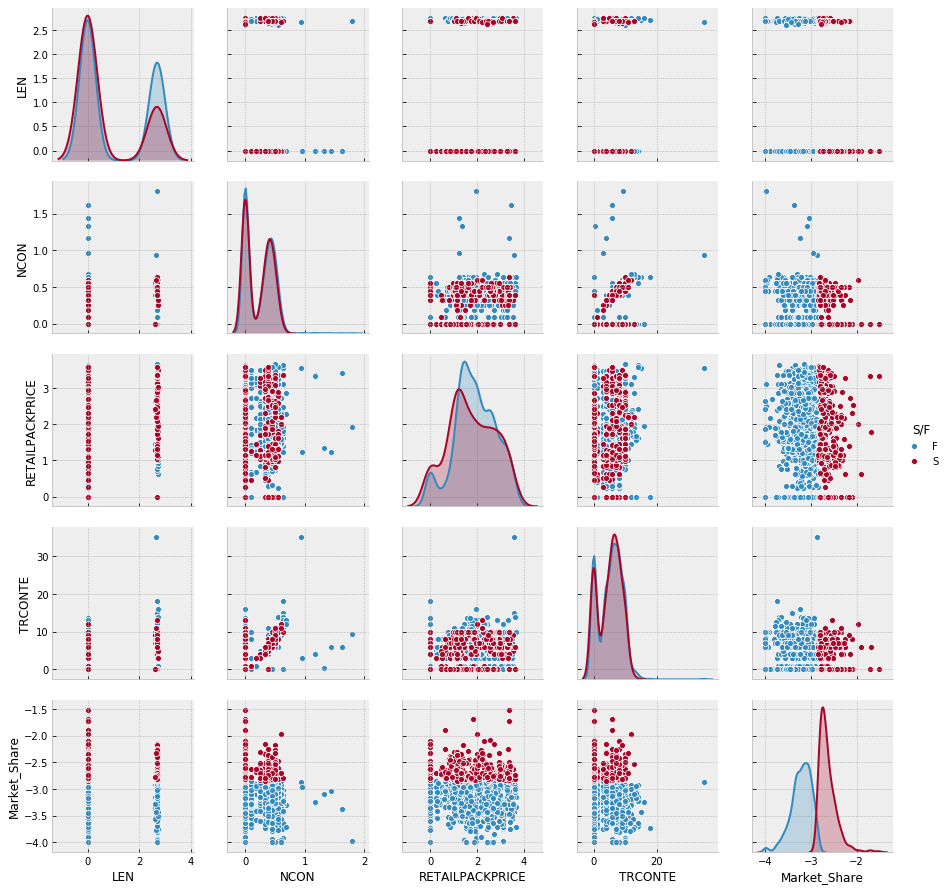

In [41]:
sns.pairplot(df_num, hue='S/F', markers='o');

We can see some small relationships:

* Succesfull launches RETAILPACKPRICE distribution is turned to left a bit compared to not Succesfull launches.
* When LEN=0, Succesfull launches are more than not Succesfull ones.
* When NCON is high, not Succesfull launches are more than Succesfull ones.


In [42]:
del df_num

### Categorical to Numerical relationship

In [43]:
# selcting categorical features
df_cat = df[df['data_type'] == 'train']
df_cat = df_cat.select_dtypes(exclude=['float64'])

# adding response variable, removing negaiive values and making BoxCox
df_cat['Market_Share'] = df_train['Market_Share']
df_cat = df_cat[df_cat['Market_Share'] >= 0]
df_cat['Market_Share'] = stats.boxcox(df_cat['Market_Share'] + 1e-30, lmbda=lmbda) 

df_cat.drop(columns='data_type', inplace=True)

#### Market_Share Distribution within Categorical features with boxplots

In [46]:
# helper function for plotting boxplots
def plot_boxplot(column):
    plt.figure(figsize = (25, 10))
    ax = sns.boxplot(x=column, y='Market_Share', data=df_cat)
    plt.axhline(y=threshold_transformed, label='success threshold')
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    plt.title('Market_Share distribution within {}'.format(column), fontsize=14)
    if len(df_cat[column].unique()) > 50:
        ax.set(xticklabels=[])
    else:
        plt.xticks(rotation=90)

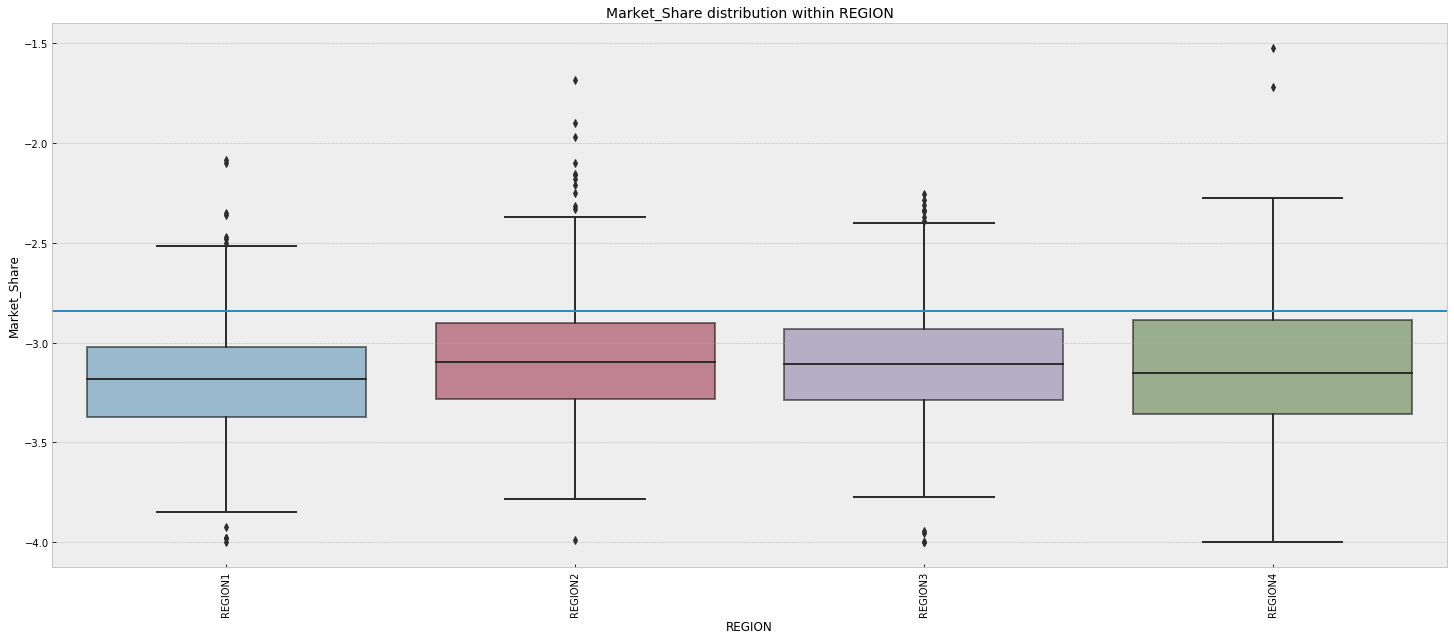

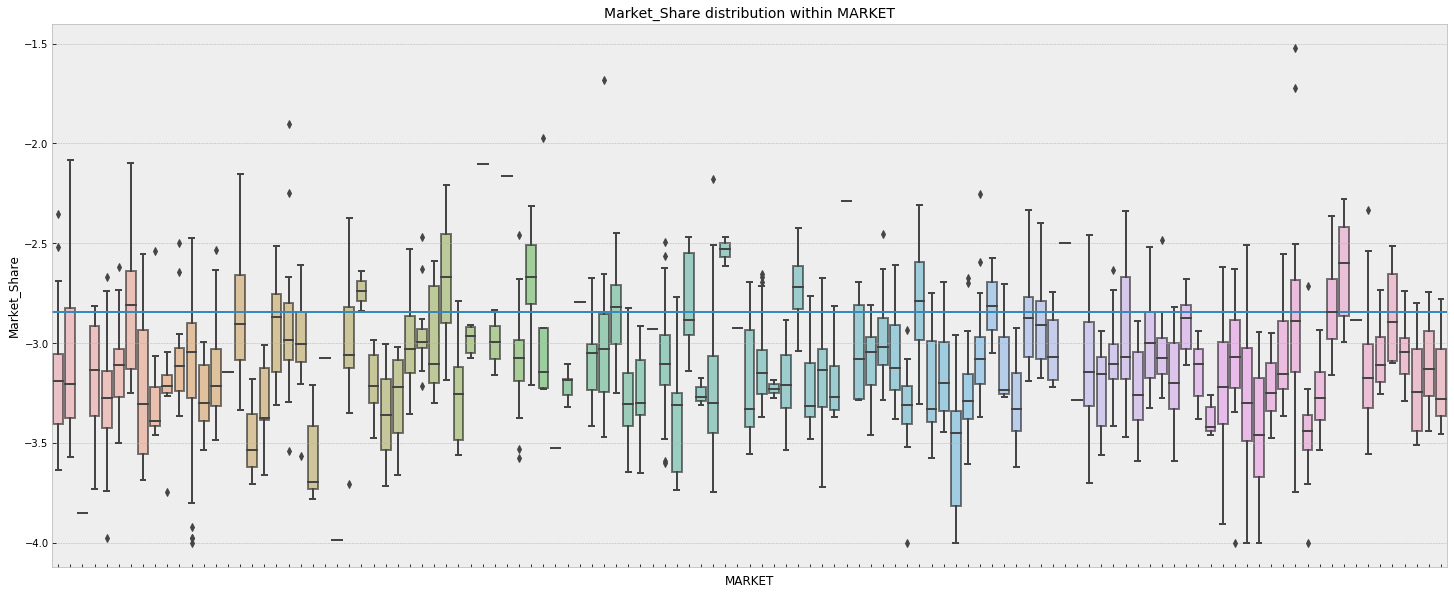

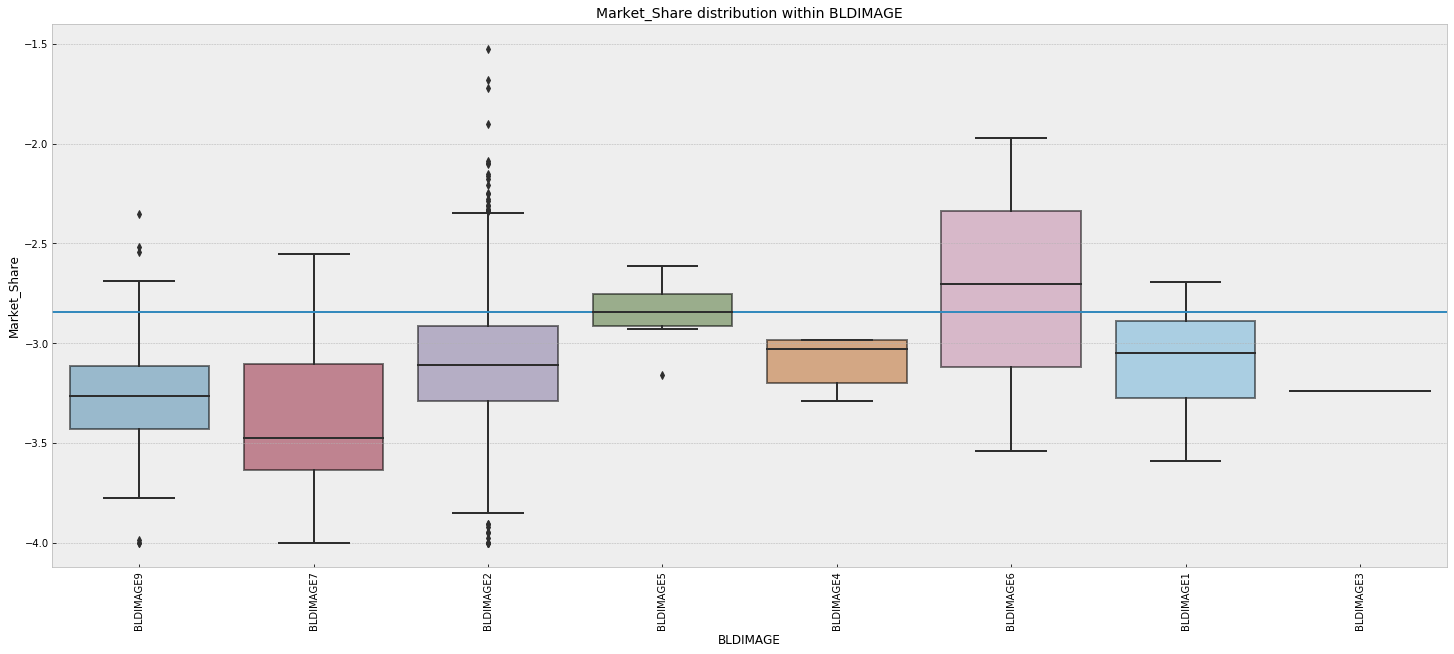

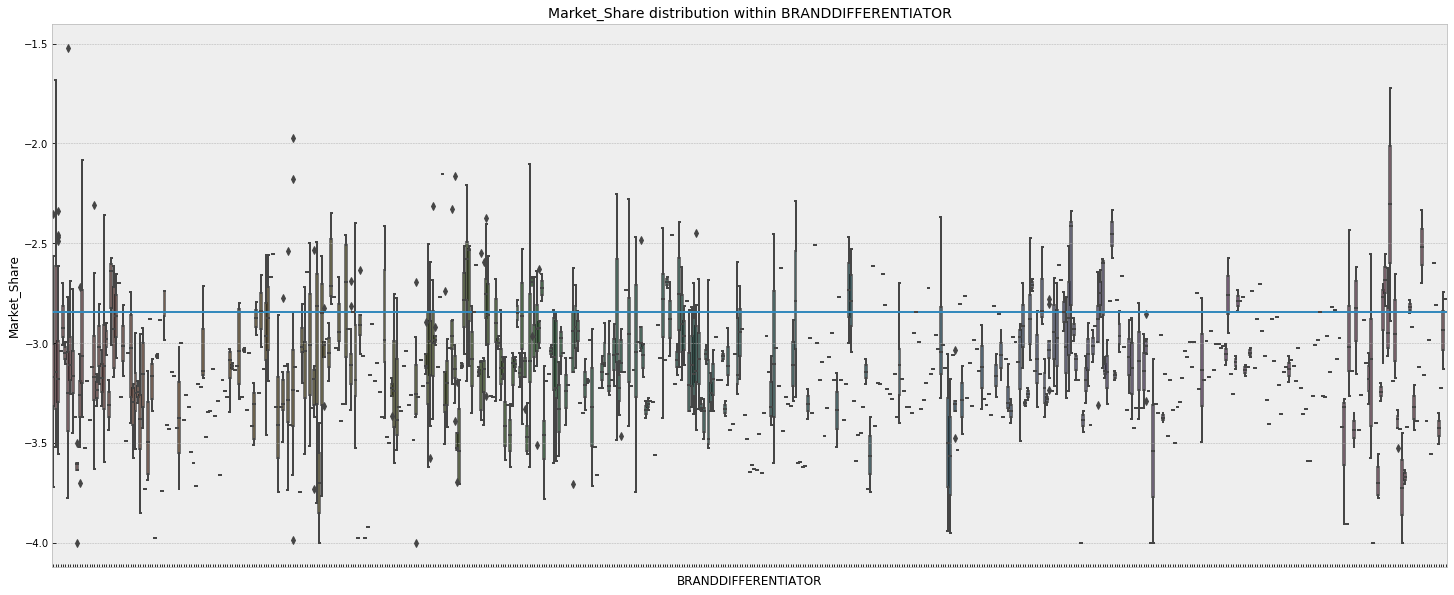

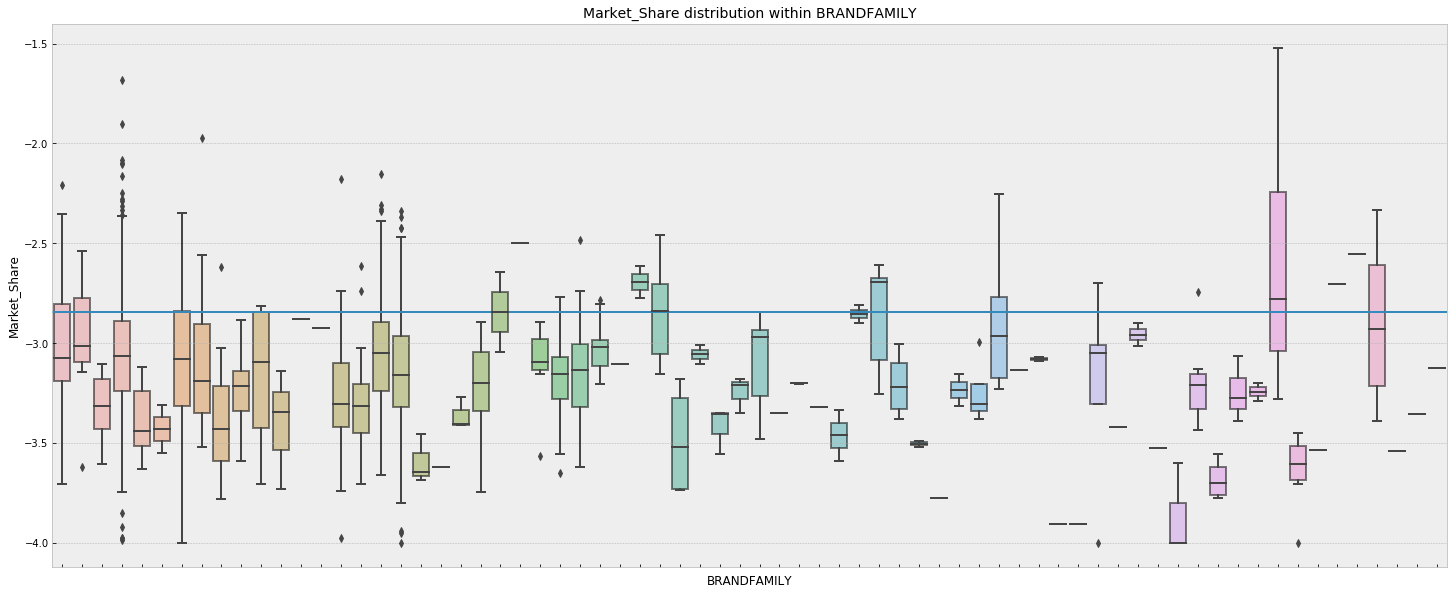

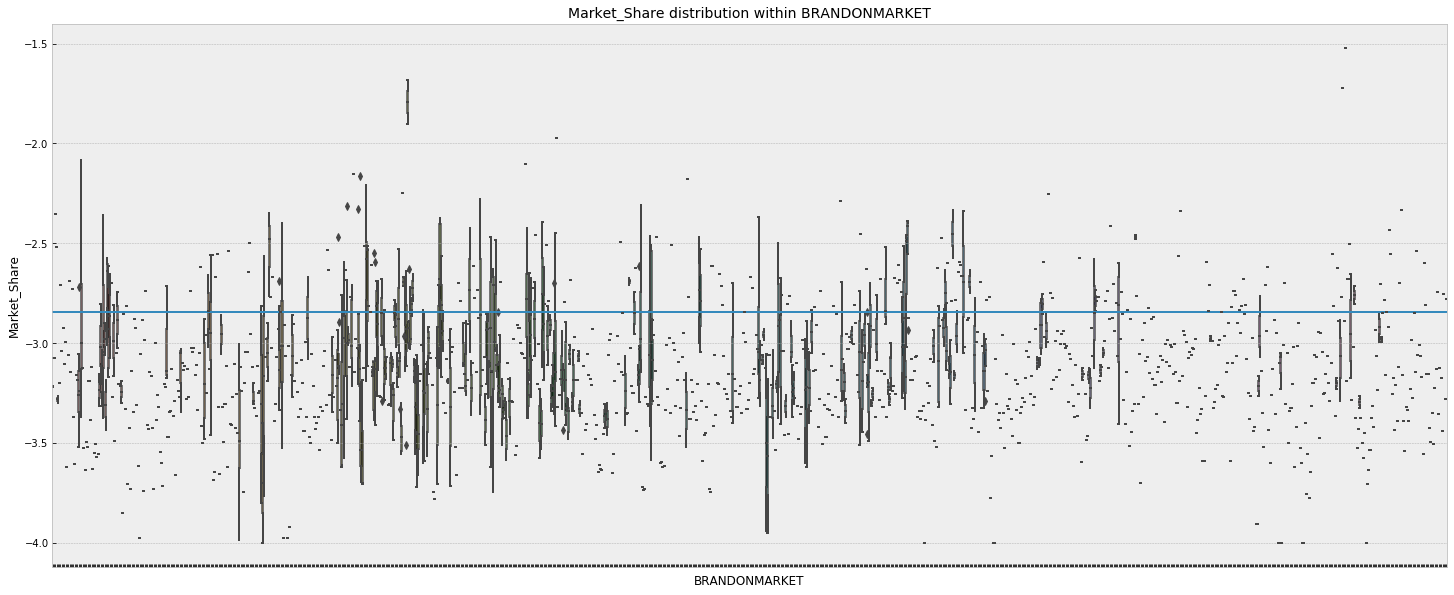

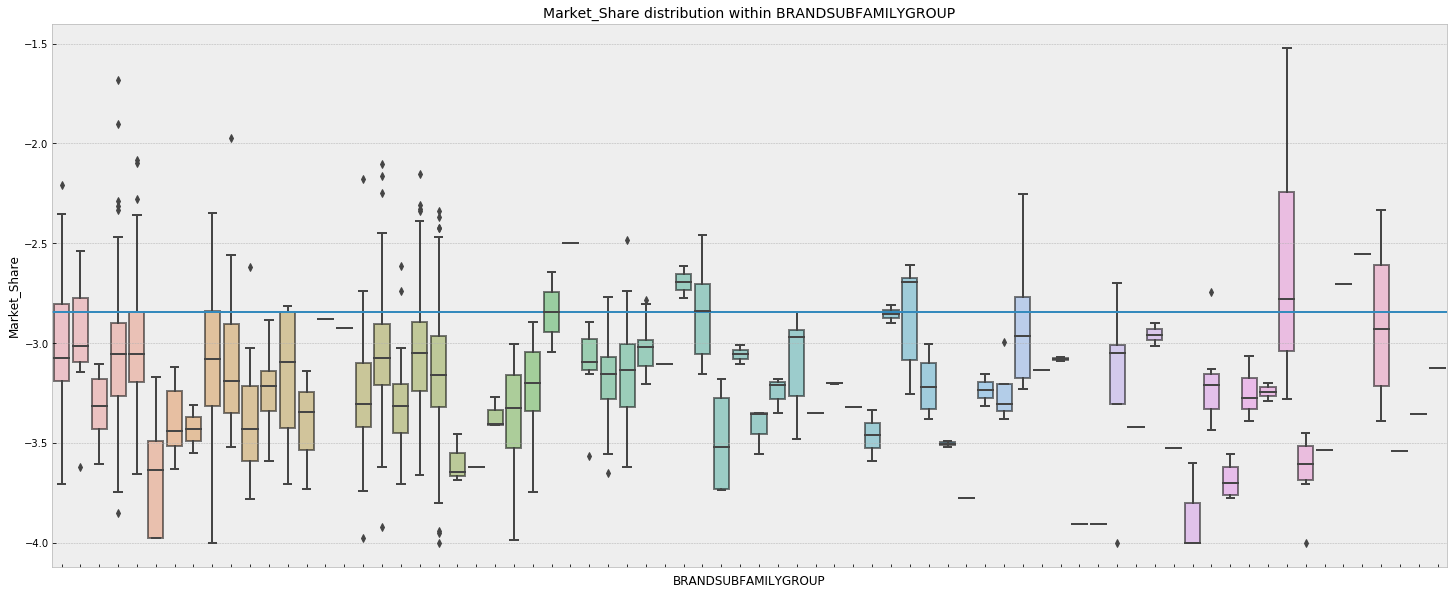

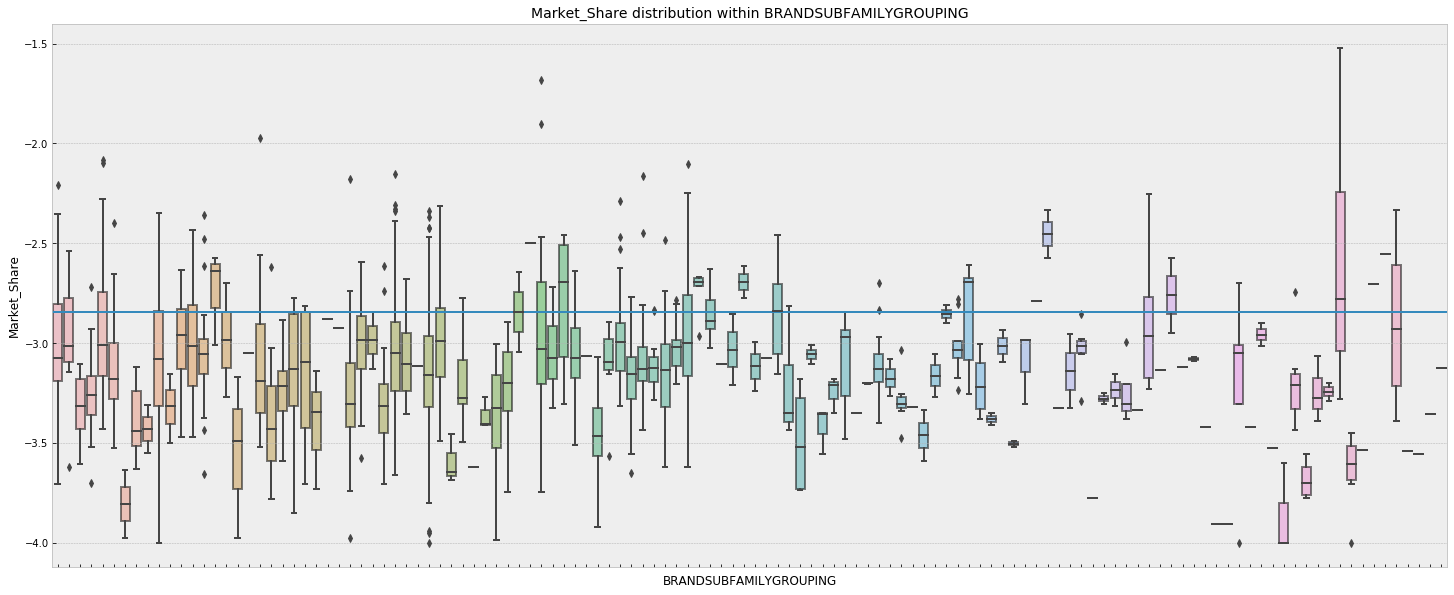

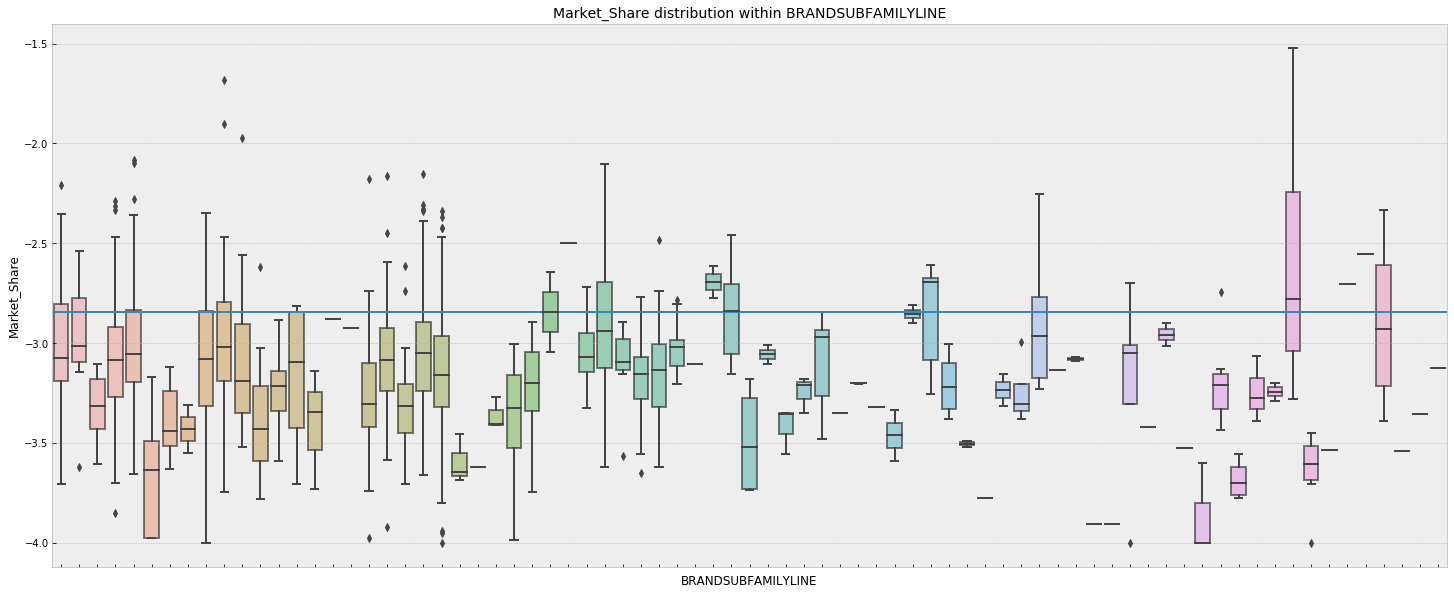

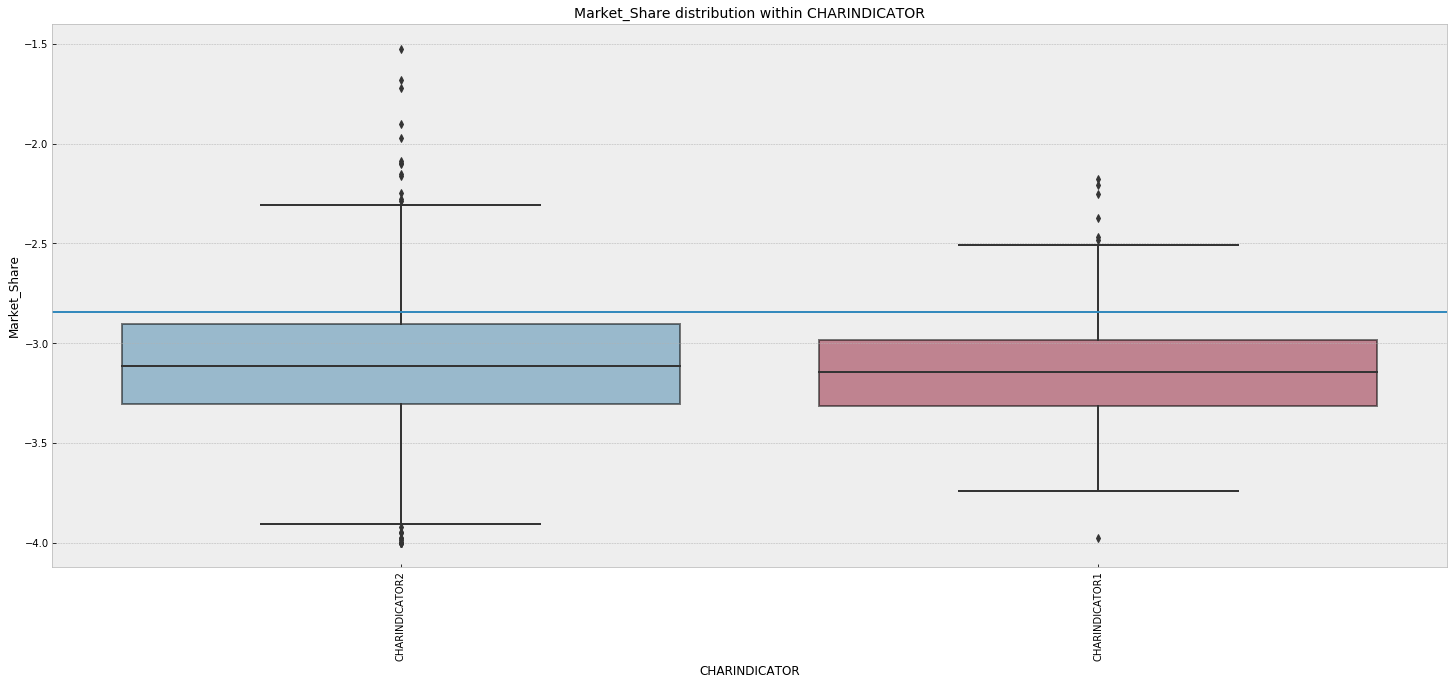

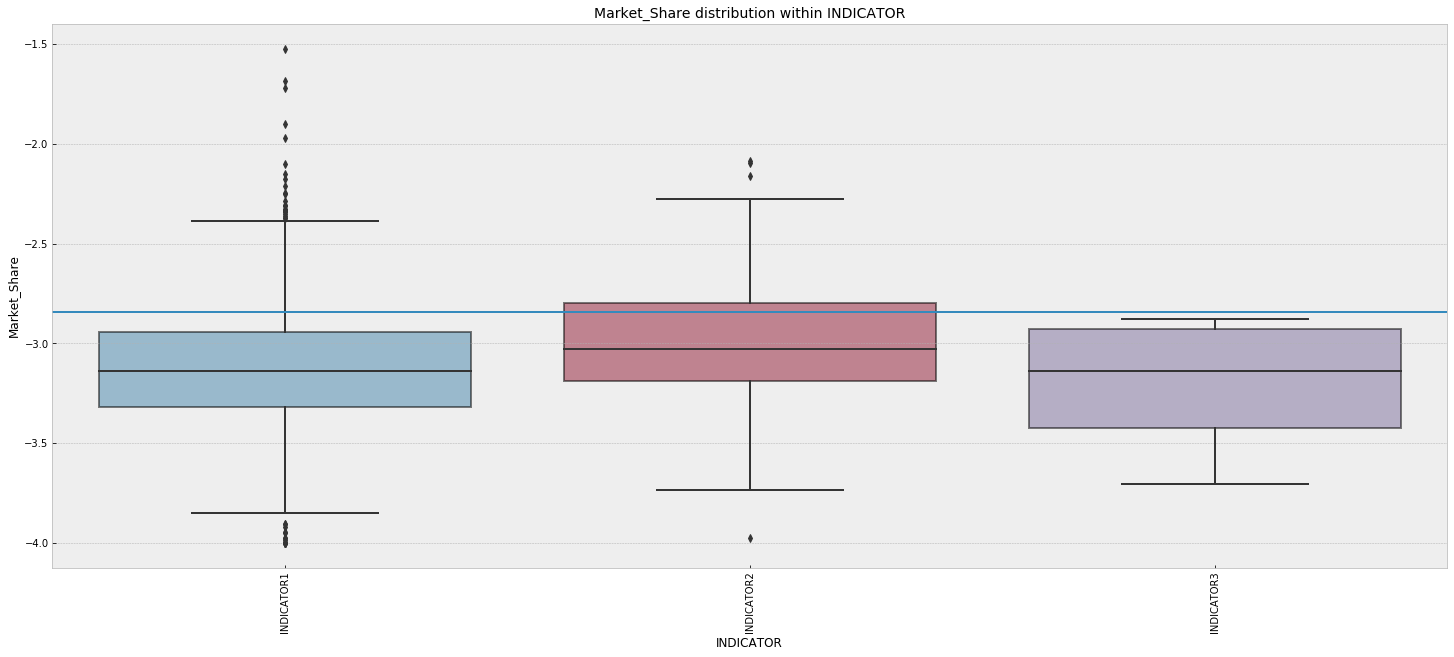

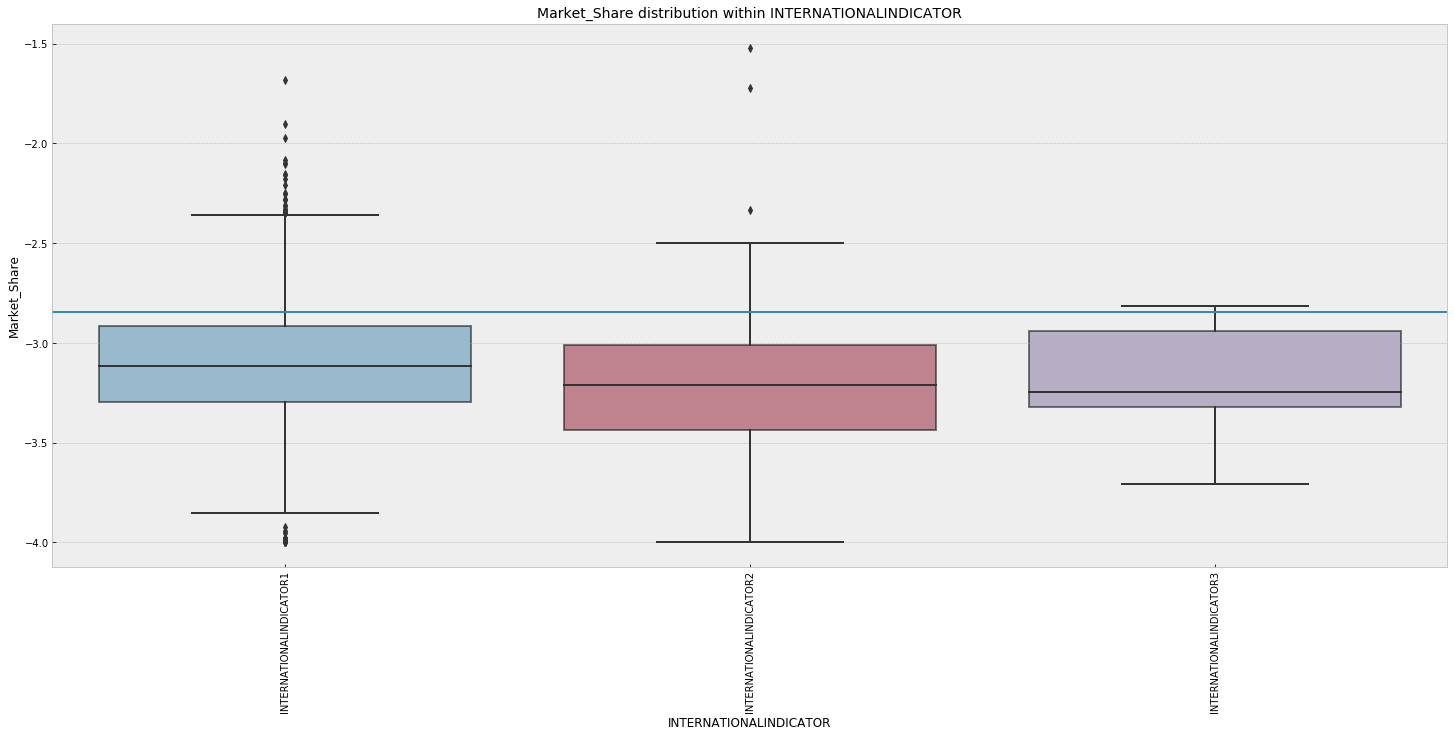

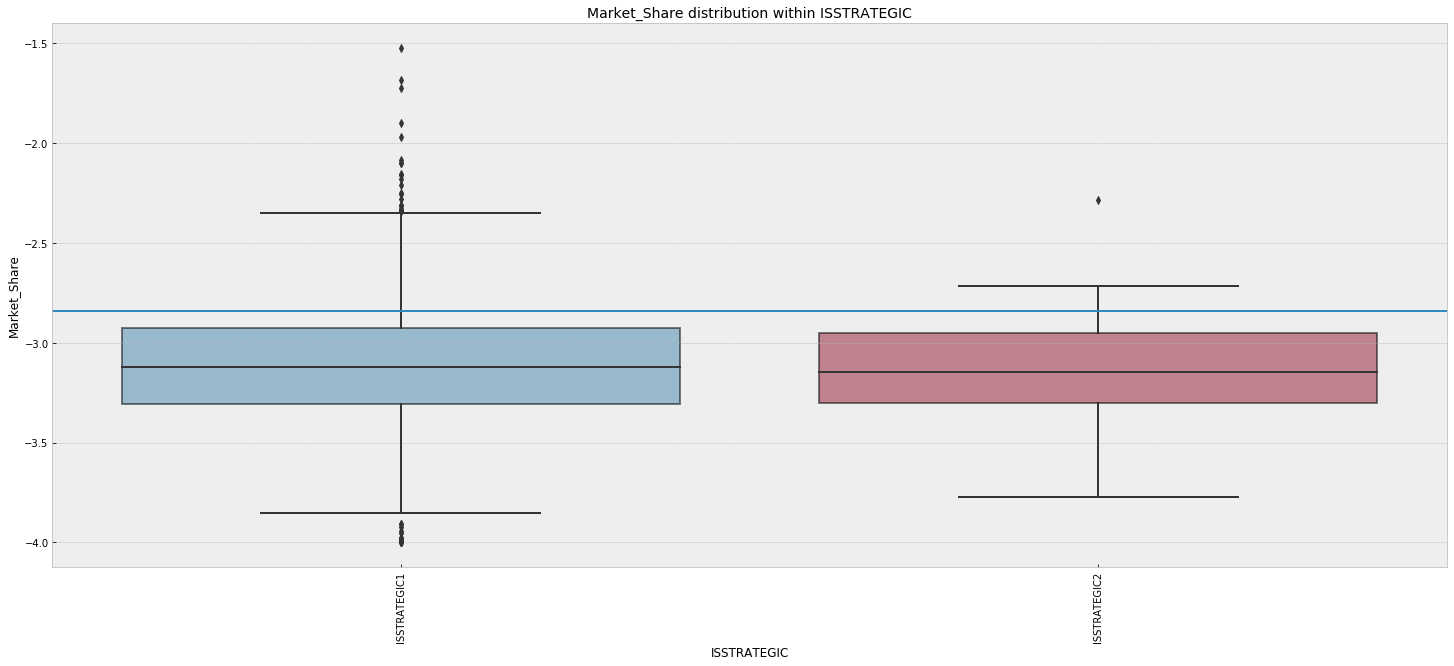

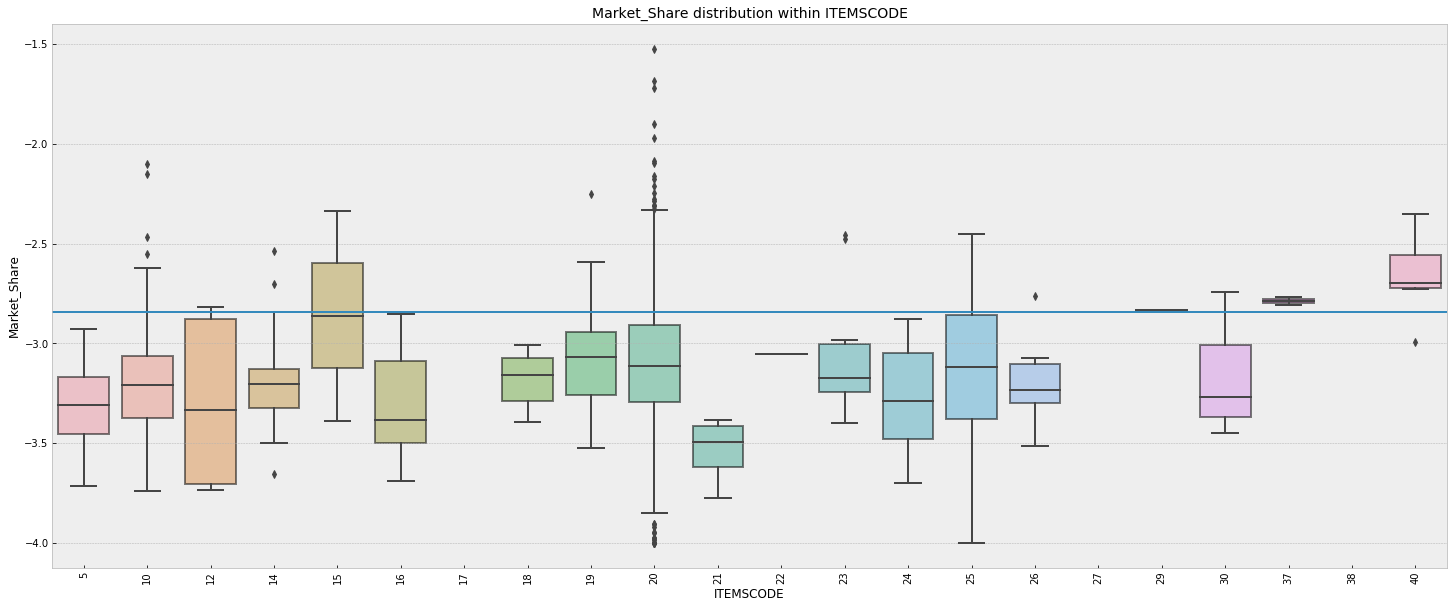

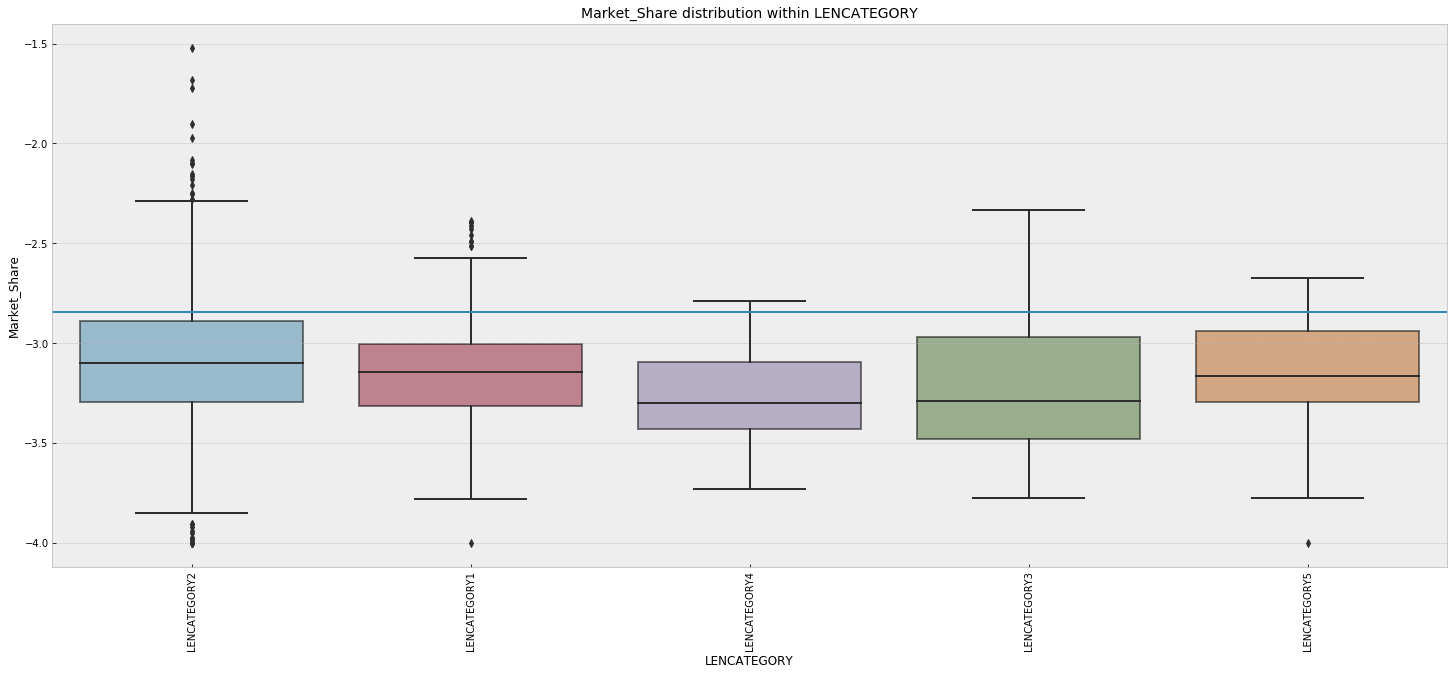

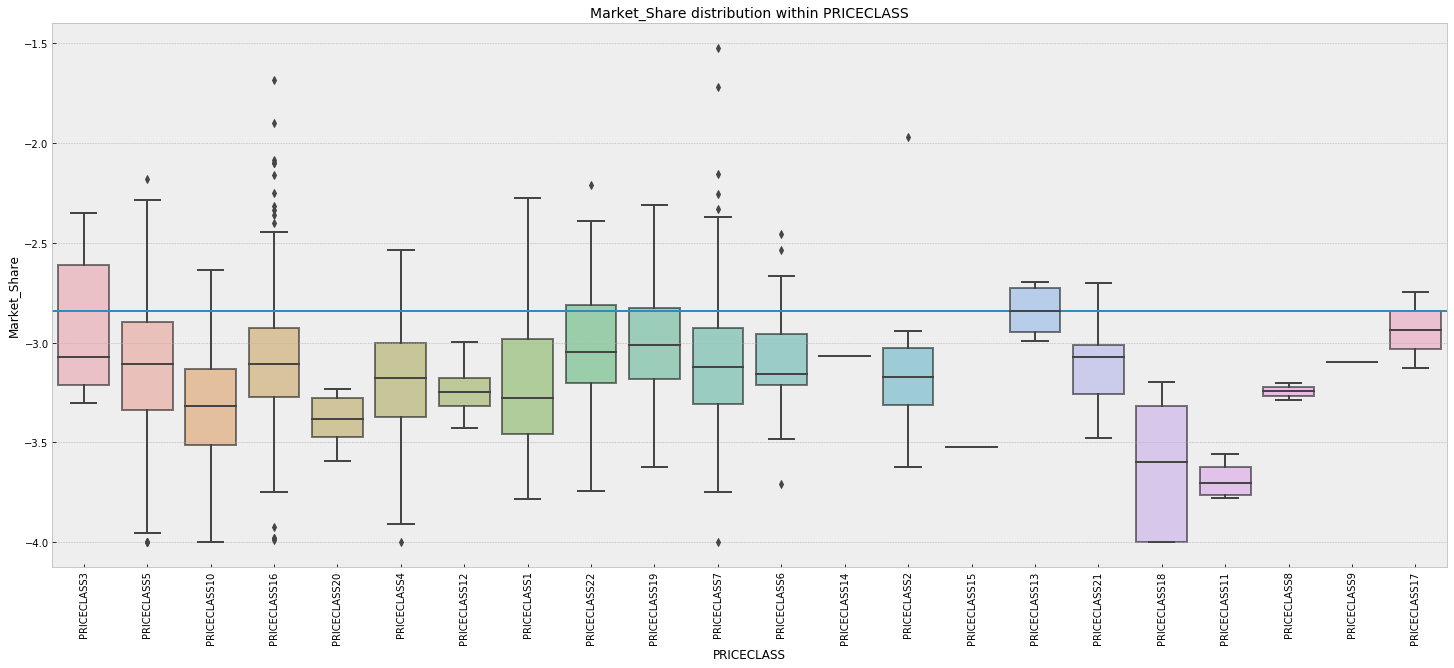

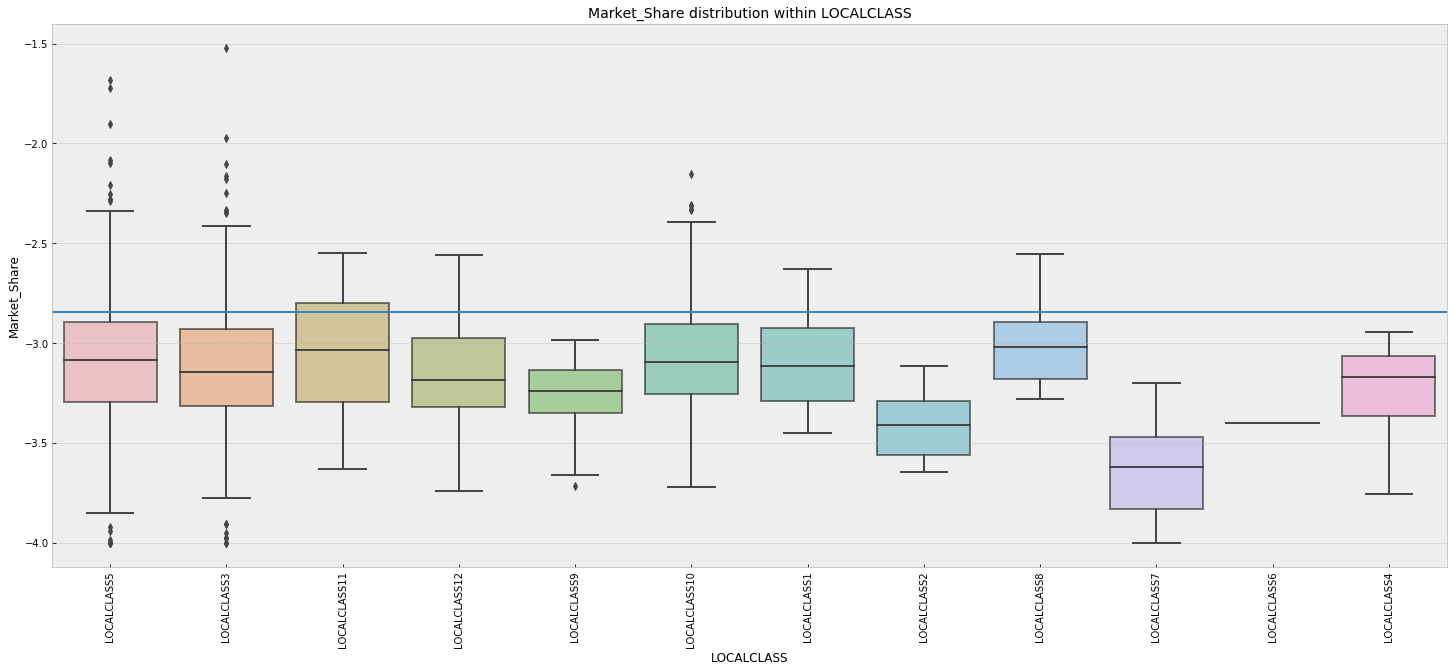

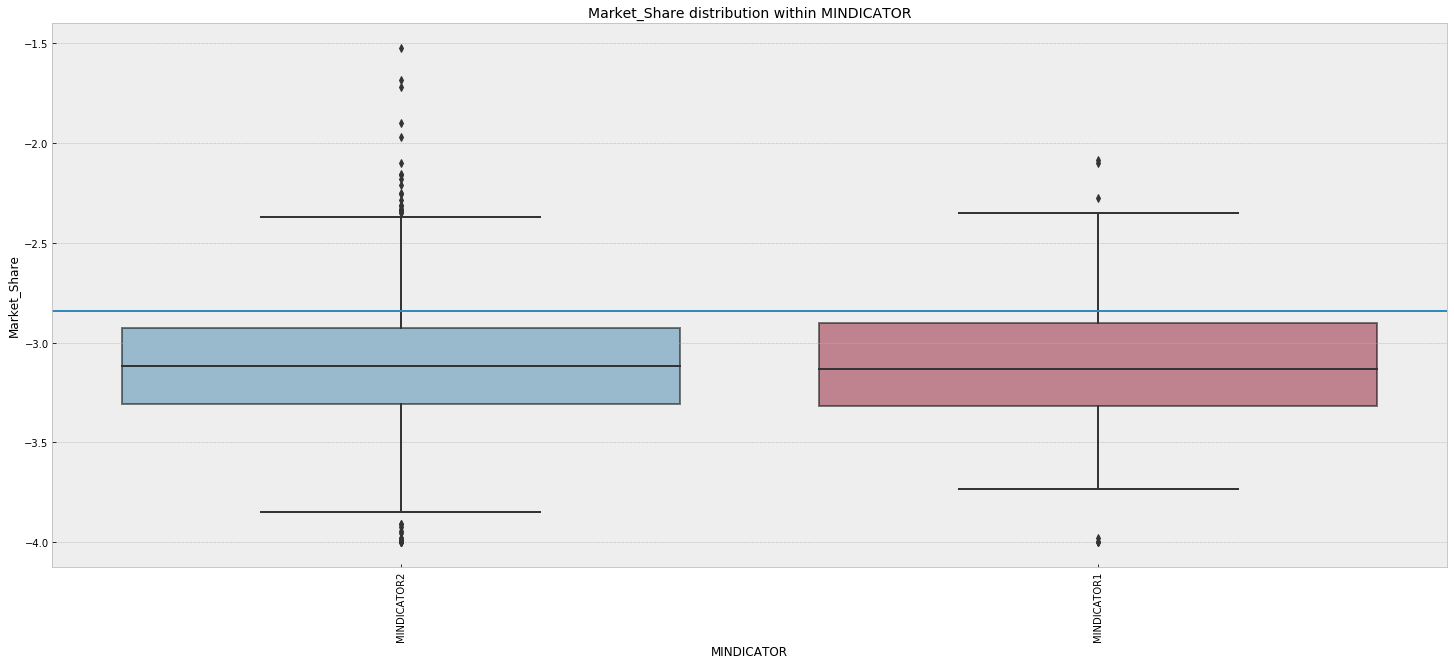

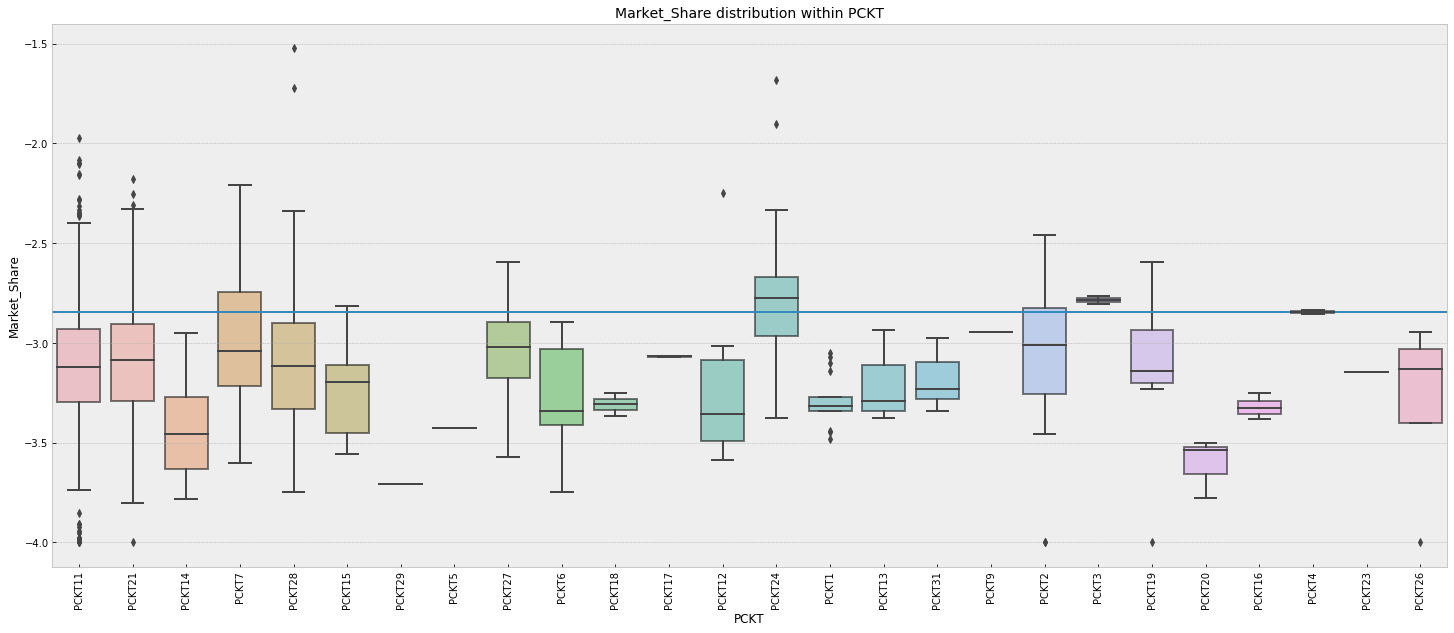

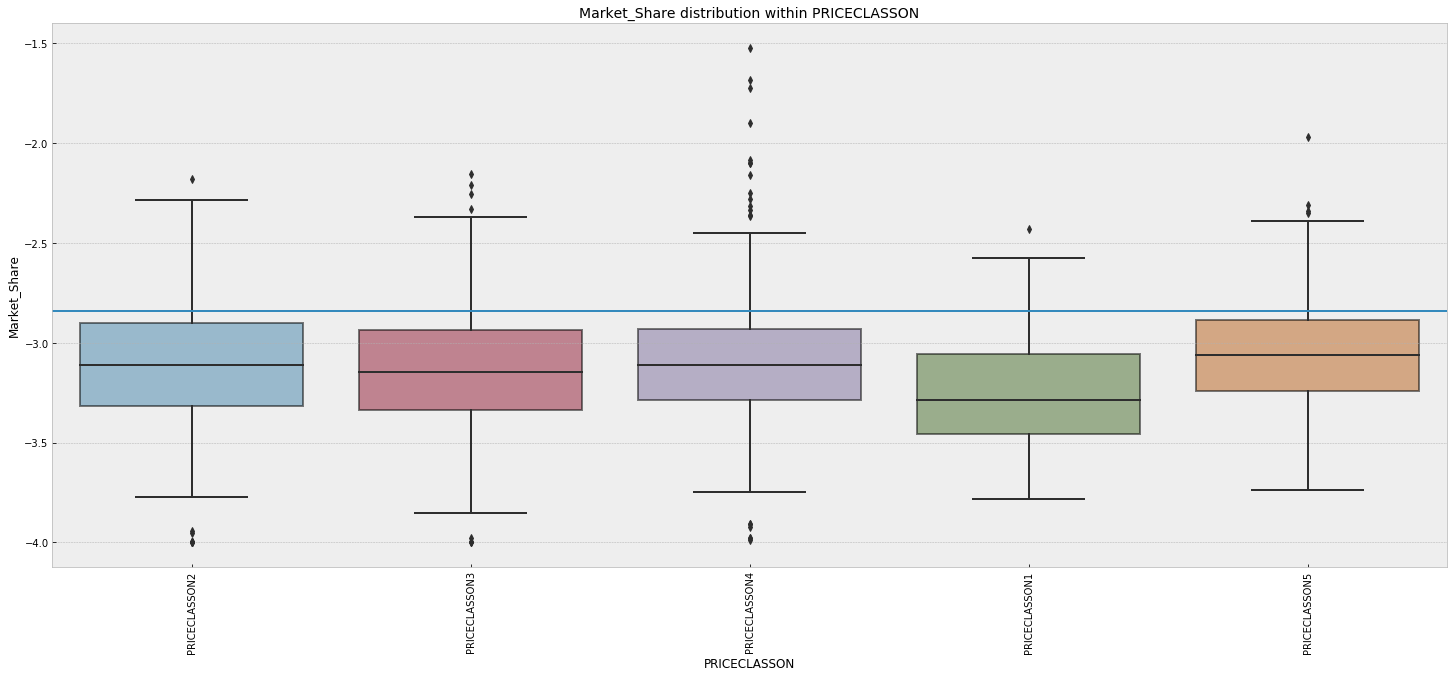

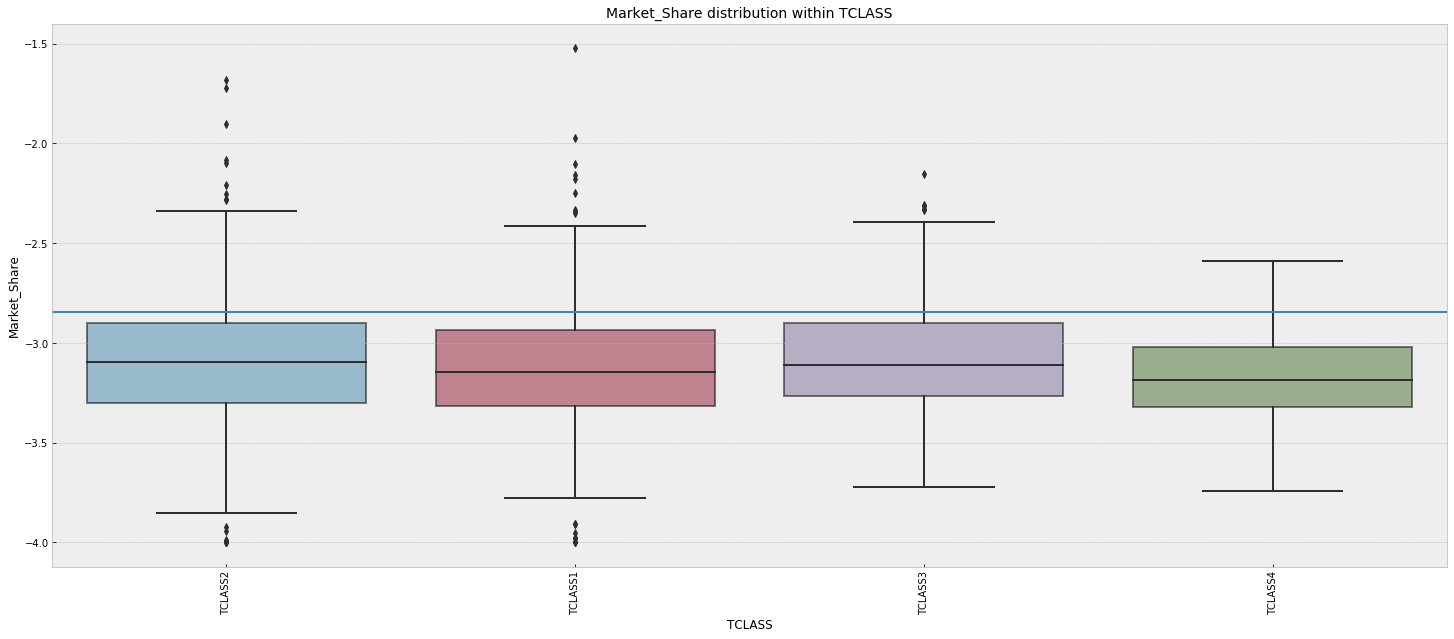

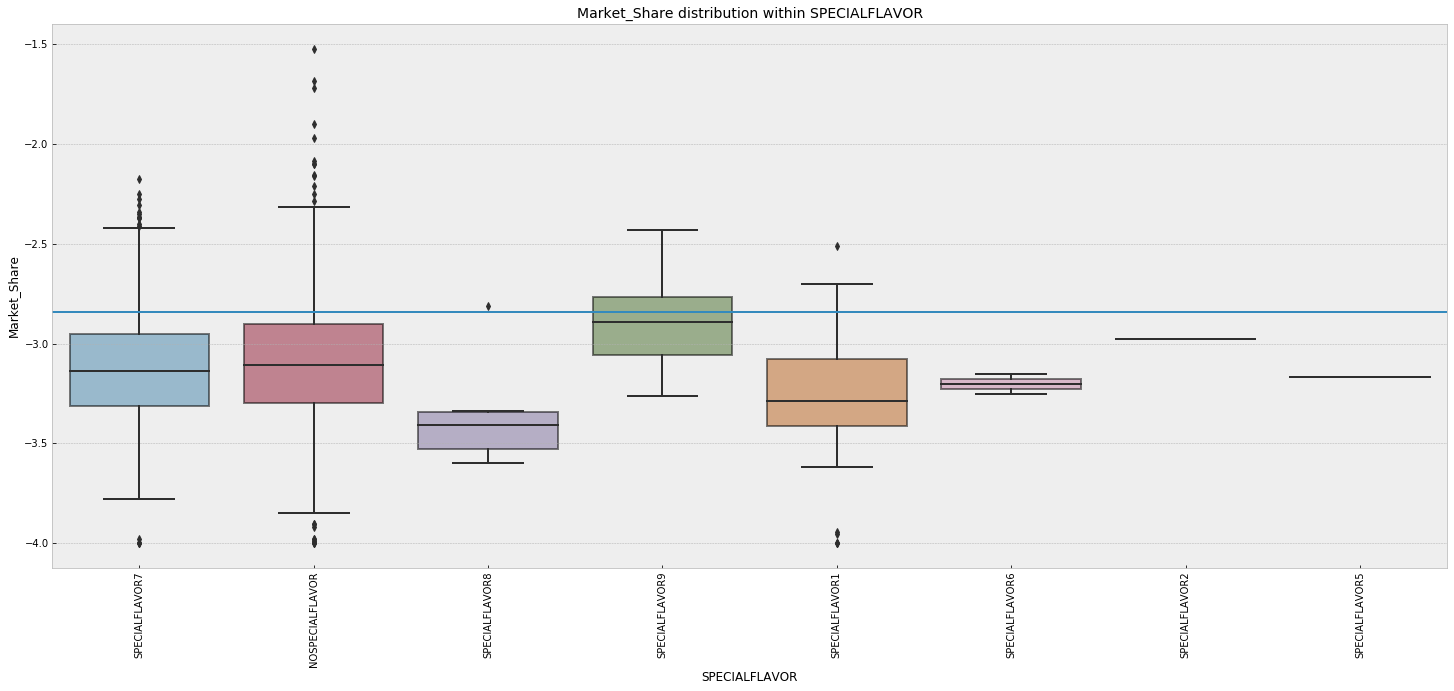

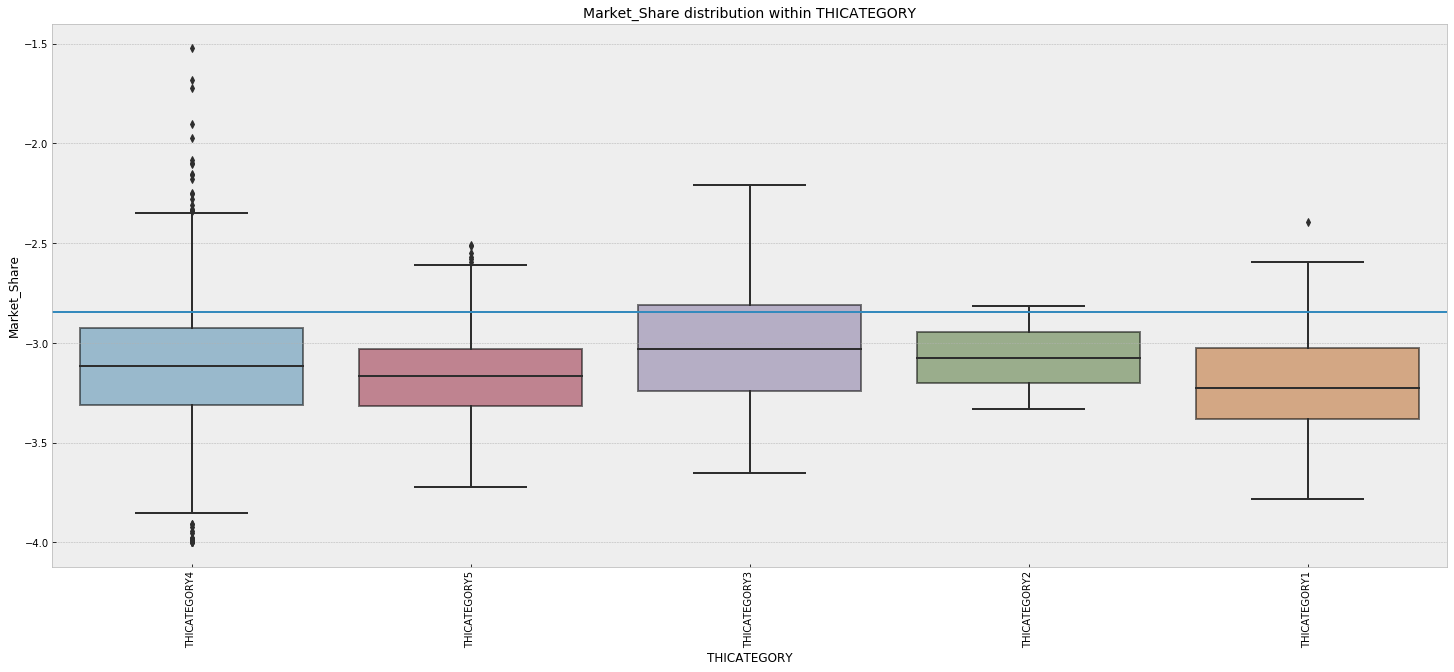

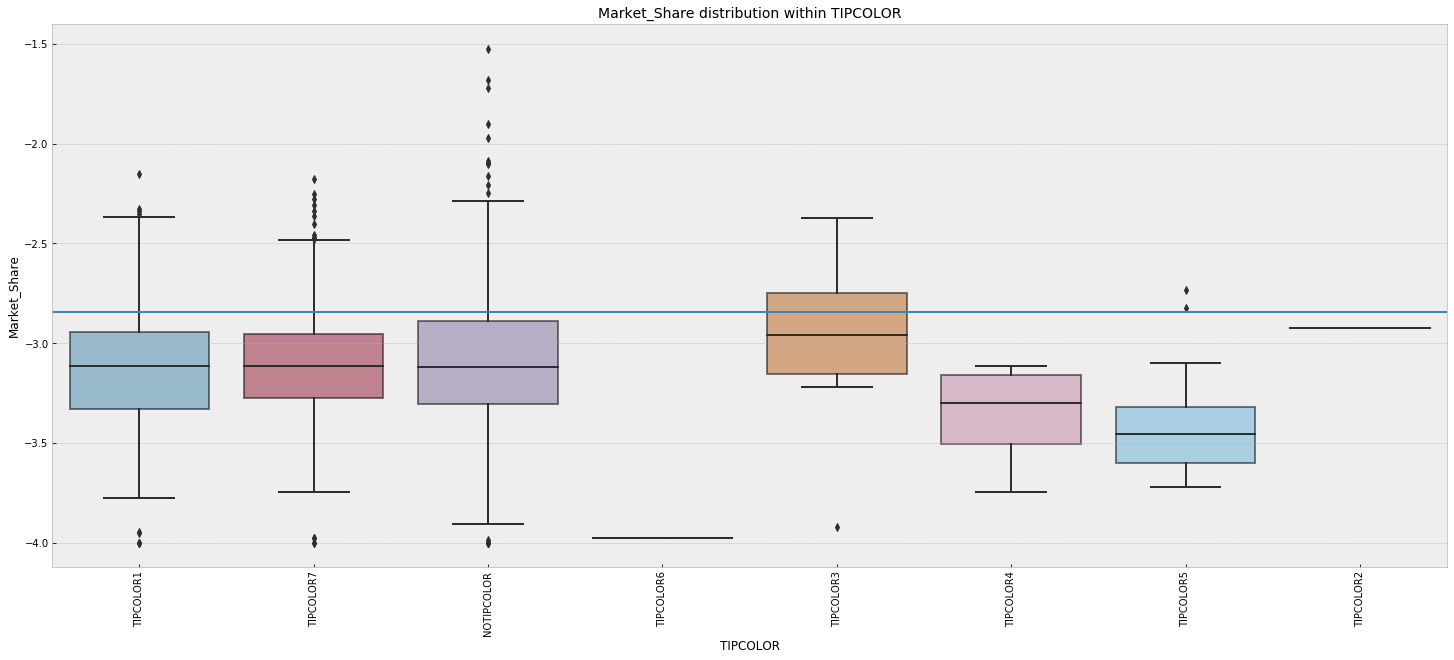

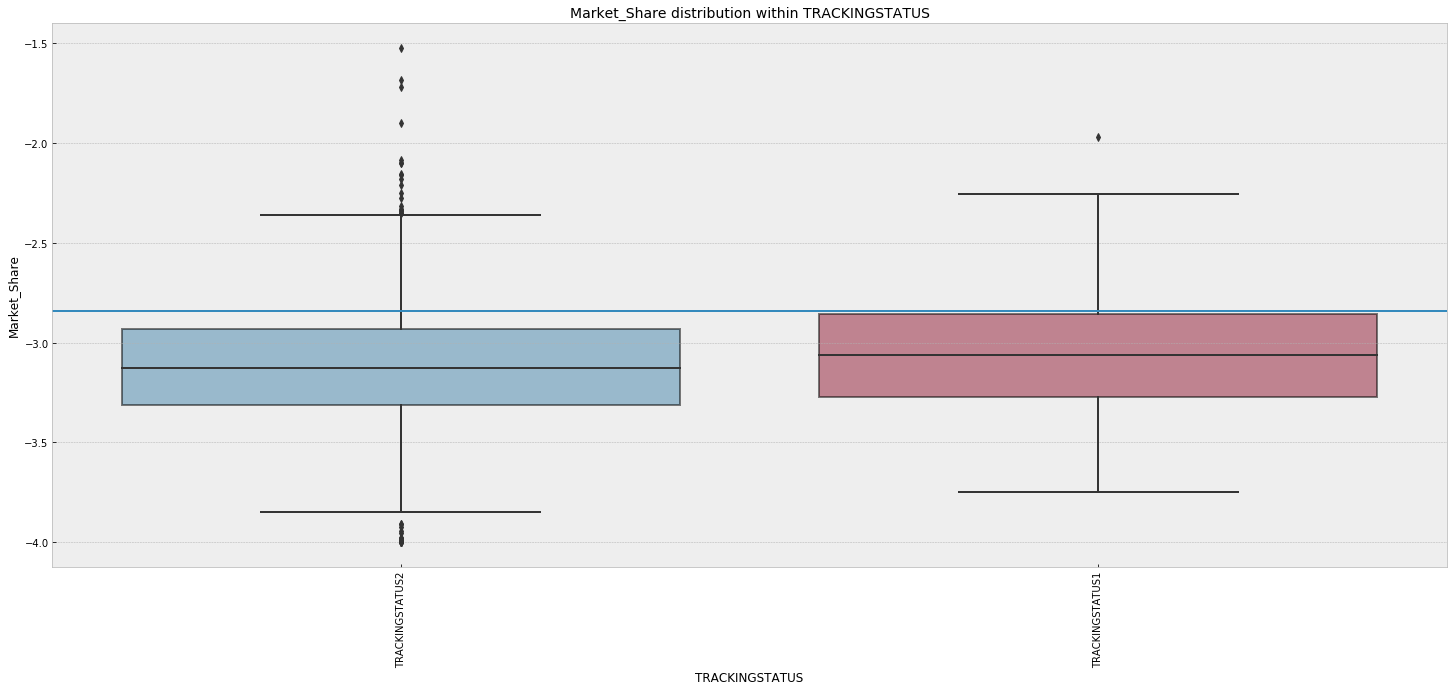

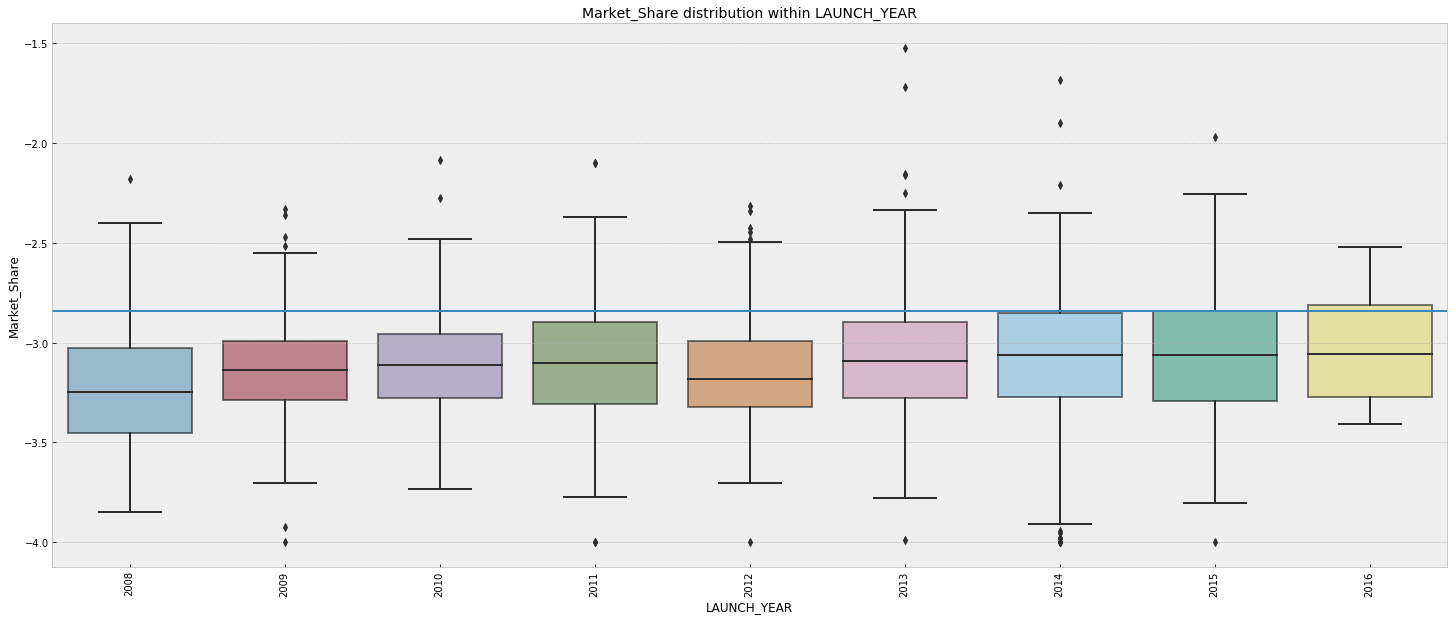

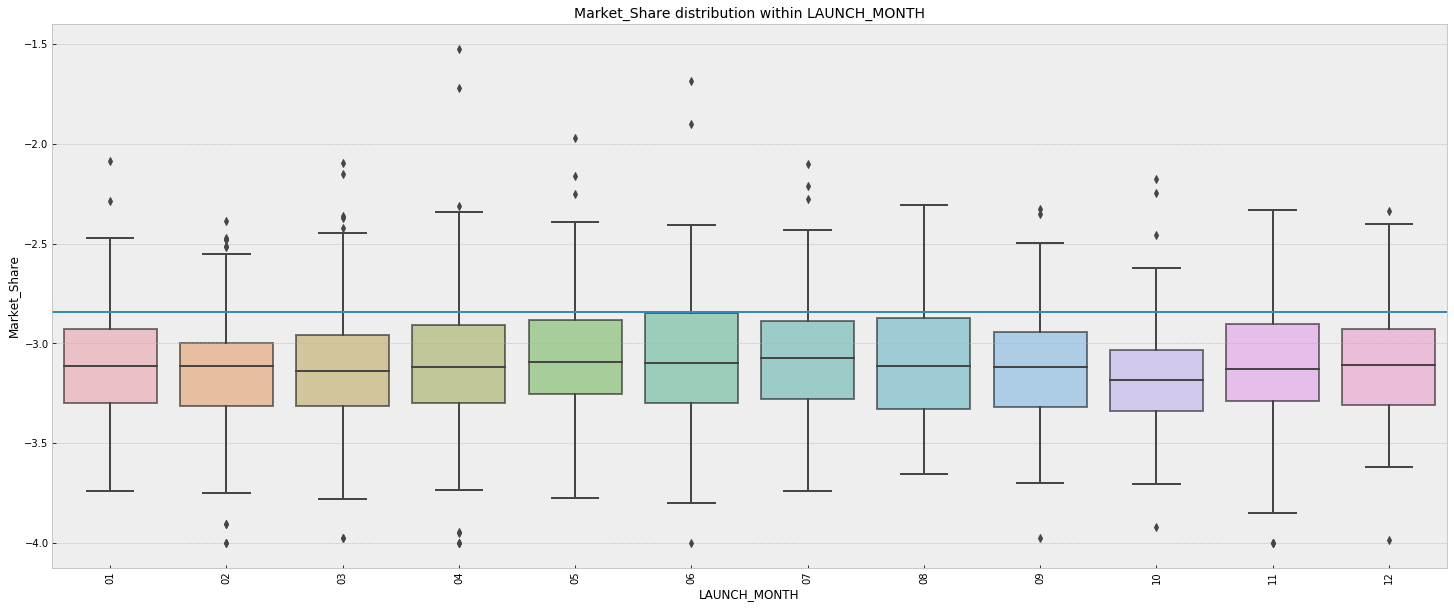

In [47]:
for column in df_cat.columns[:-1]:
    plot_boxplot(column)

We can see visible dependency of **Market Share** distribution from the following features:

* **MARKET**
* **BLDIMAGE**
* **'BRAND' related all features"**
* **ITEMSCODE**
* **PRICECLASS**
* **PCT**
* **SPECIALFLAVOR**


For the other features we can see that within their categories **Market Share** distribution more or less is  not varying a lot.

#### Success probability within Categorical features

In [48]:
# adding Success or Failure
df_cat['S/F'] = df_cat['Market_Share'] > threshold_transformed

In [49]:
# helper function for plotting porbabilities
def plot_success_probability(column):
    temp =  df_cat.groupby(column)['S/F'].aggregate({'Total_S': sum, 'ALL': 'count'}).reset_index()
    temp['probability'] = temp['Total_S'] / temp['ALL']
    variance = temp['probability'].var()
    plt.figure(figsize = (25, 10))
    ax = sns.pointplot(x=temp[column], y=temp['probability'])
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    plt.title('SUCCESS probability within {}, variance = {:.3f}'.format(column, variance), fontsize=14)
    if len(temp[column].unique()) > 50:
        ax.set(xticklabels=[])
    else:
        plt.xticks(rotation=90)

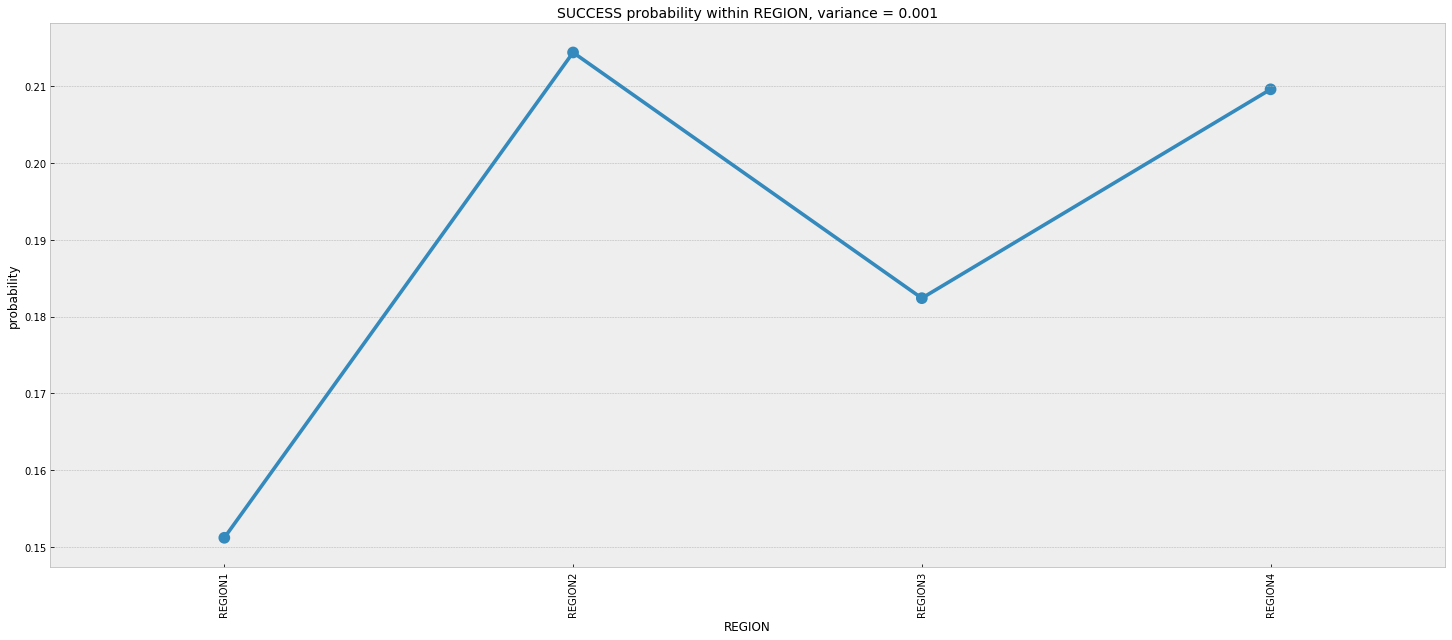

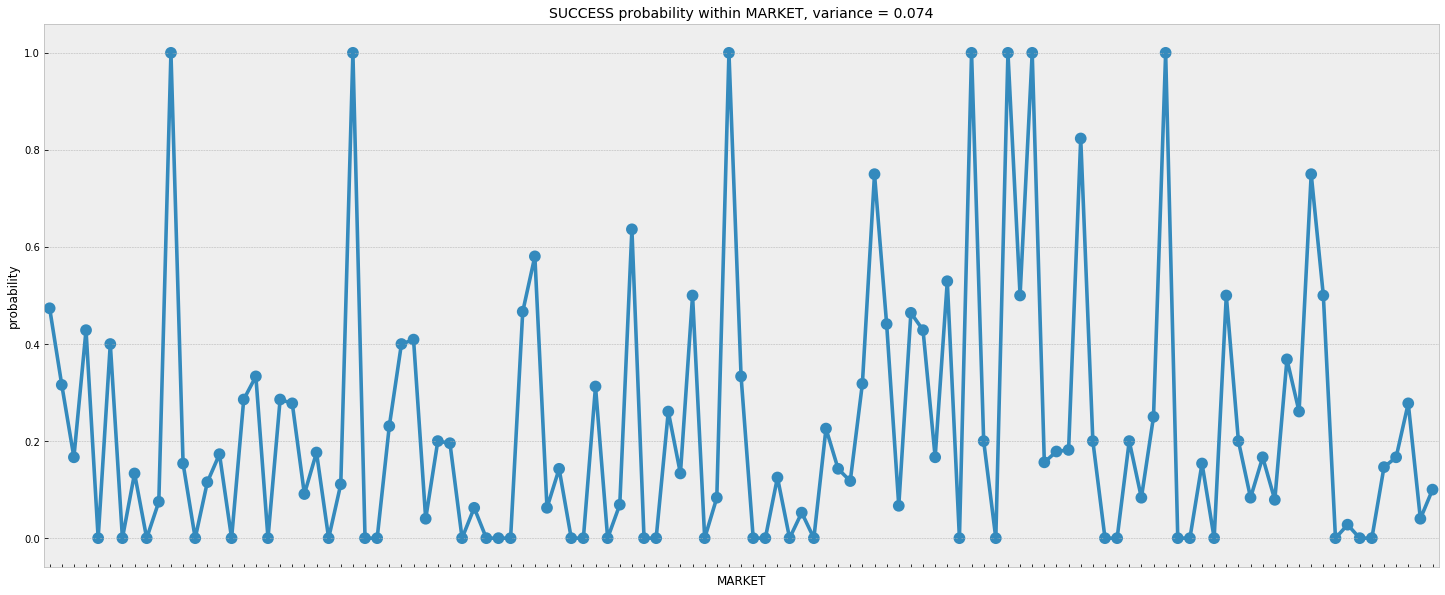

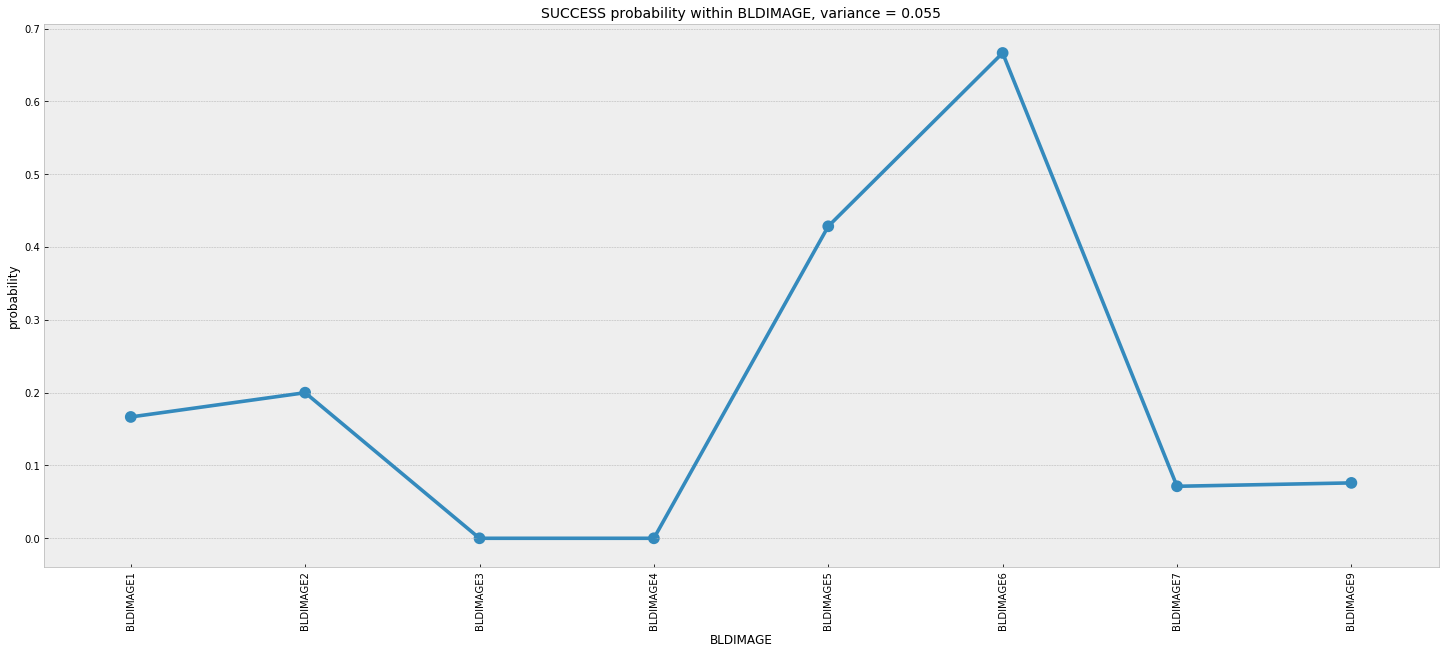

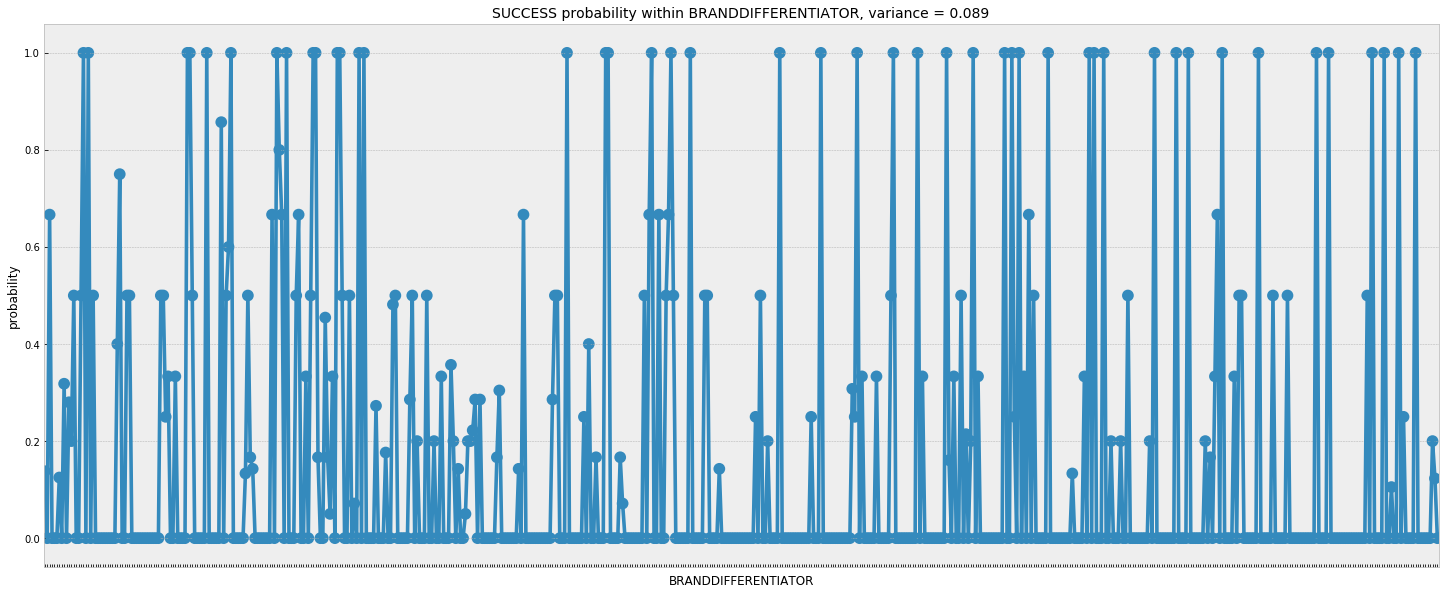

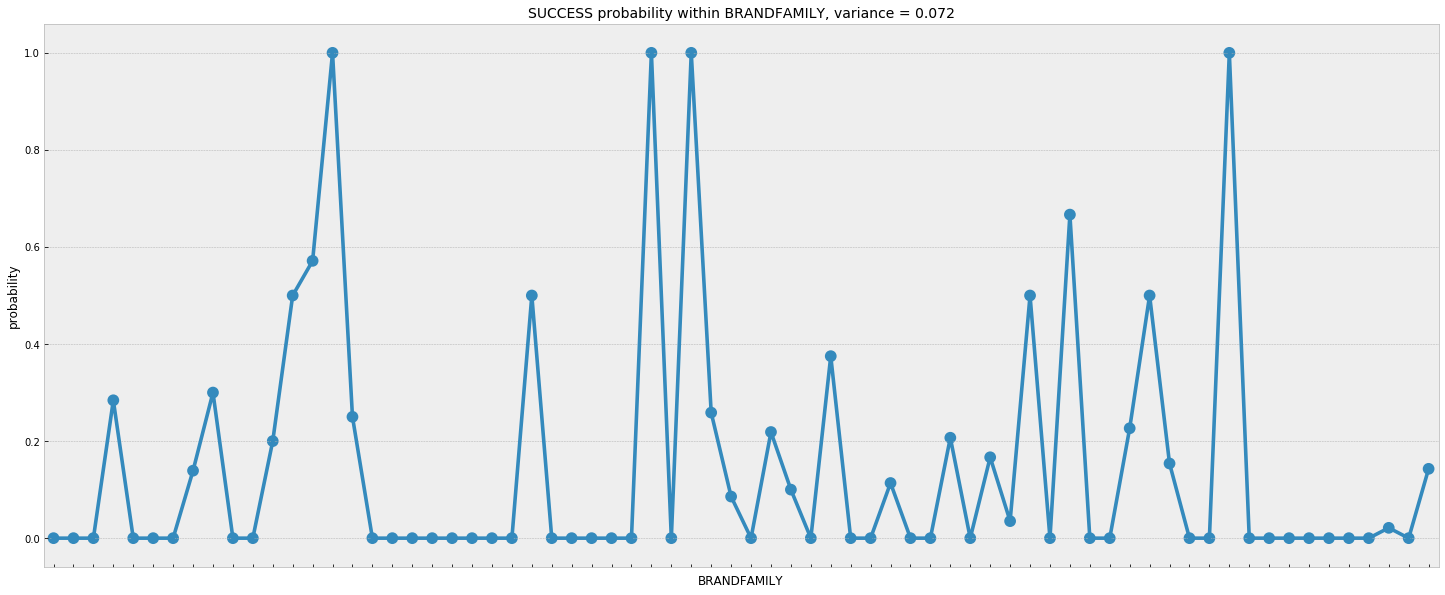

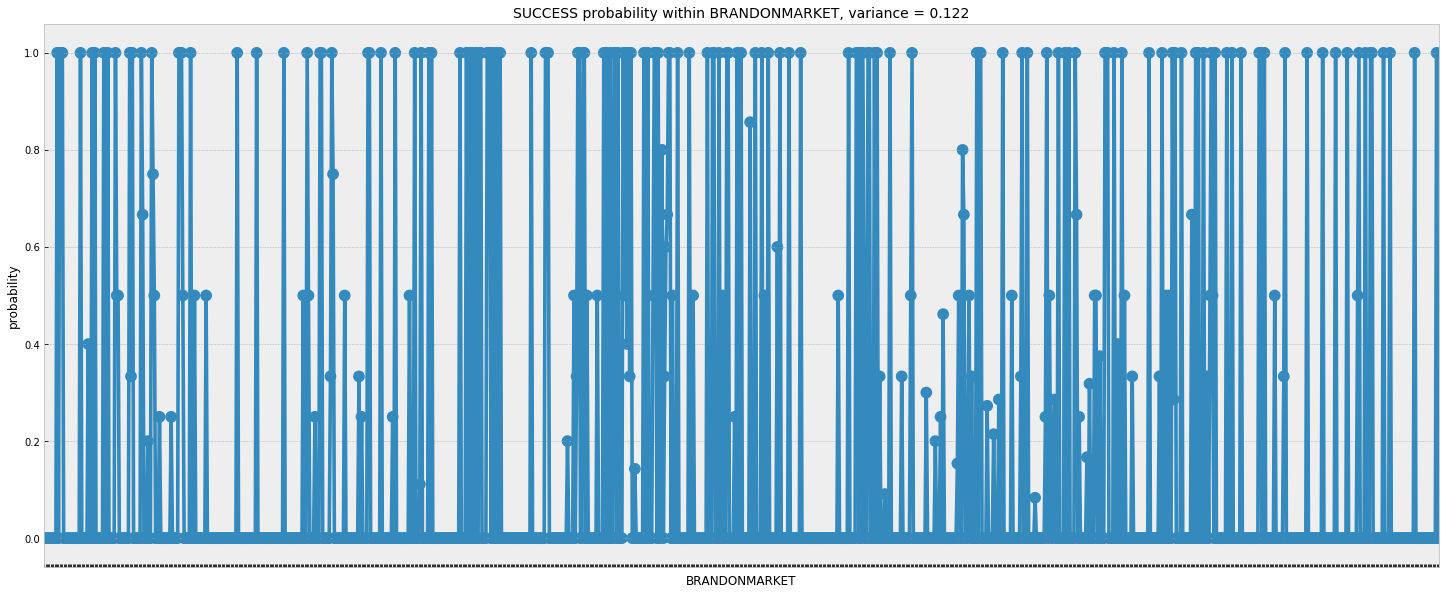

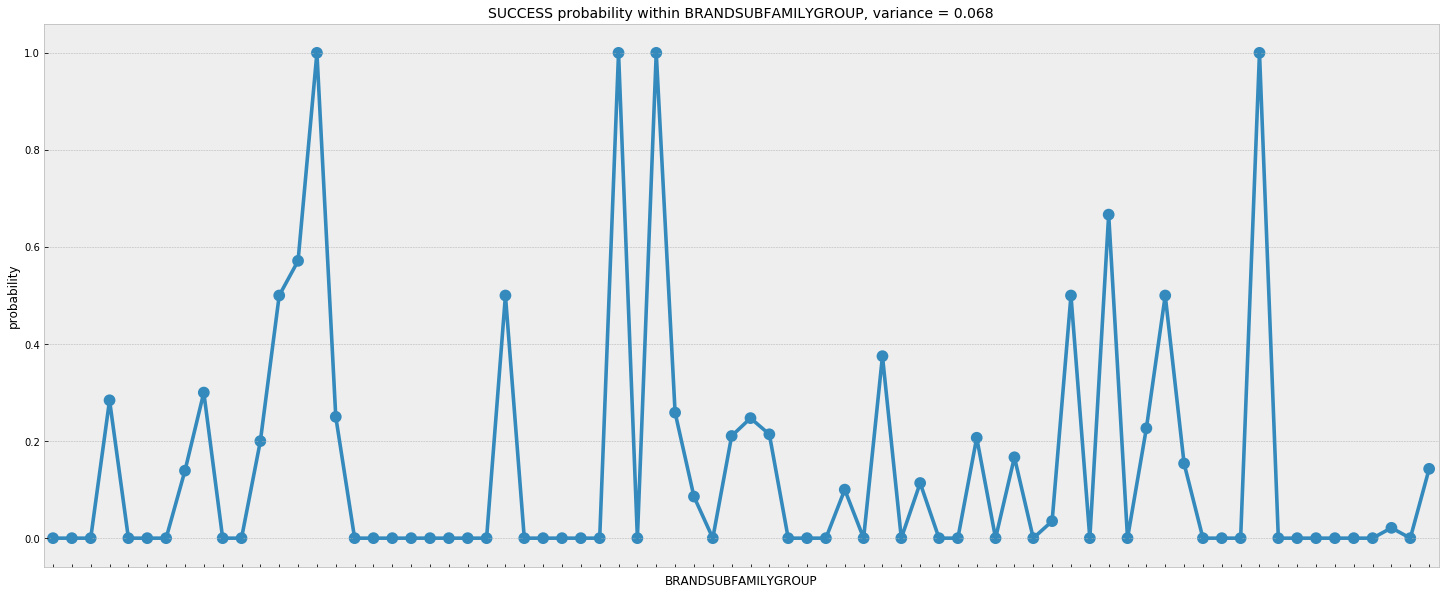

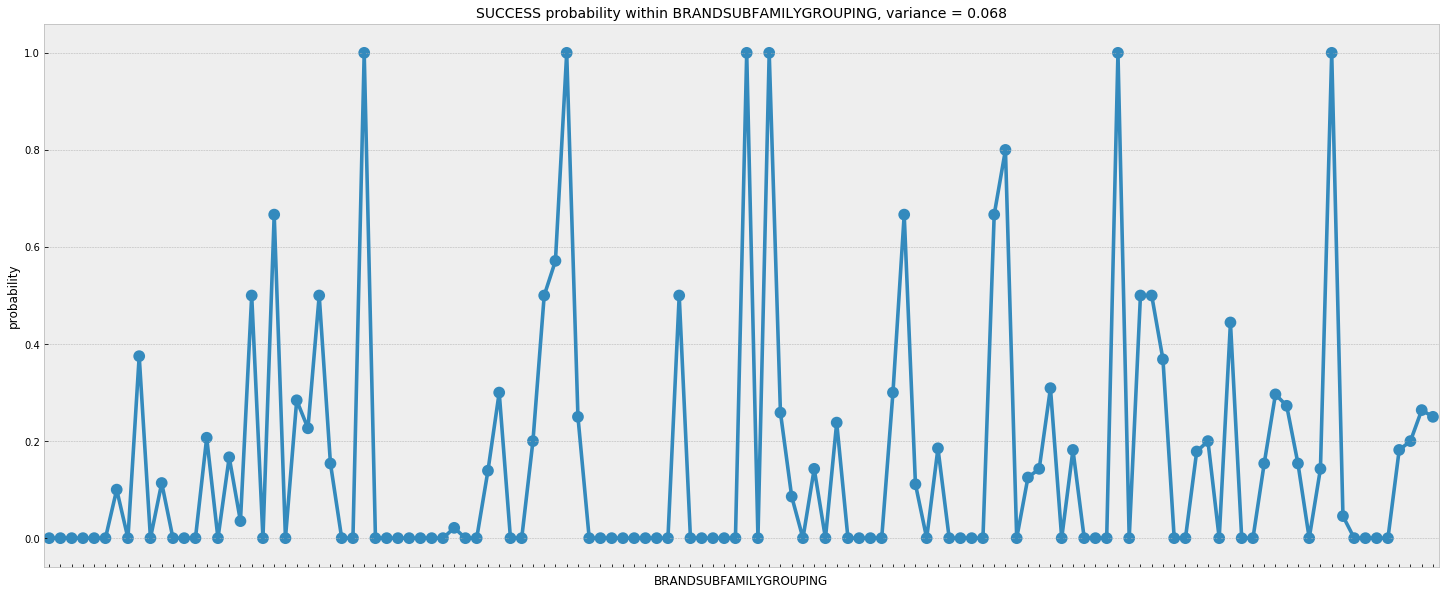

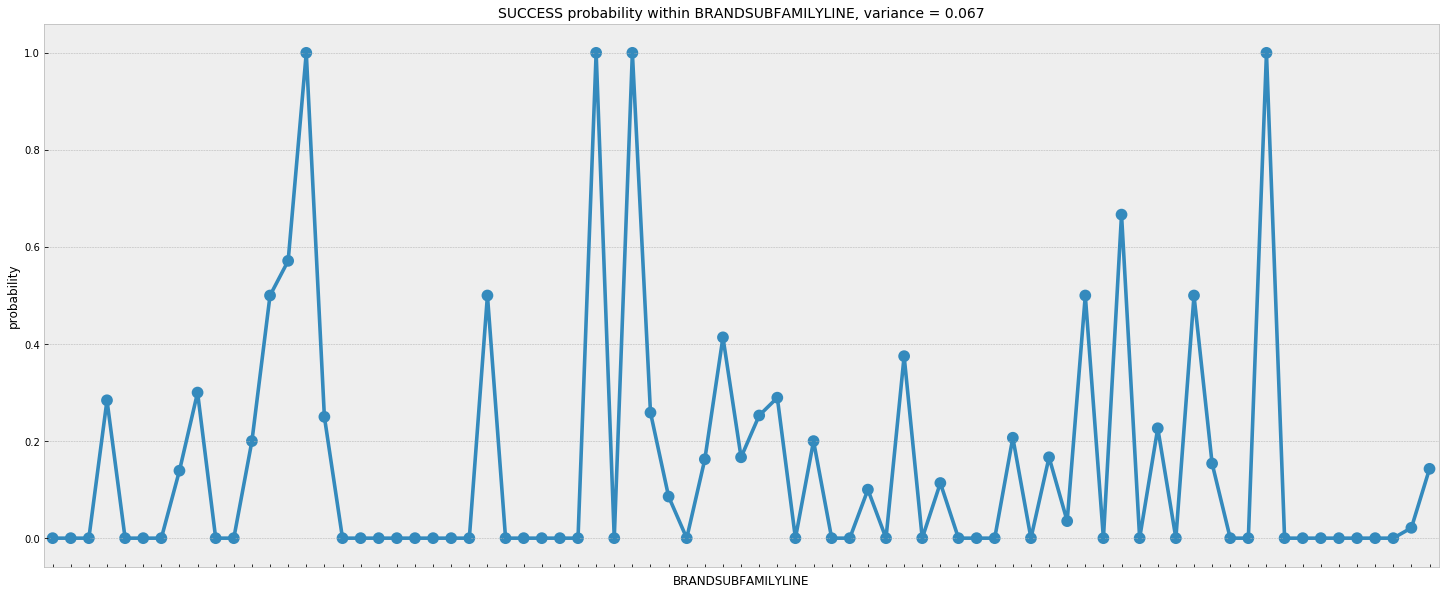

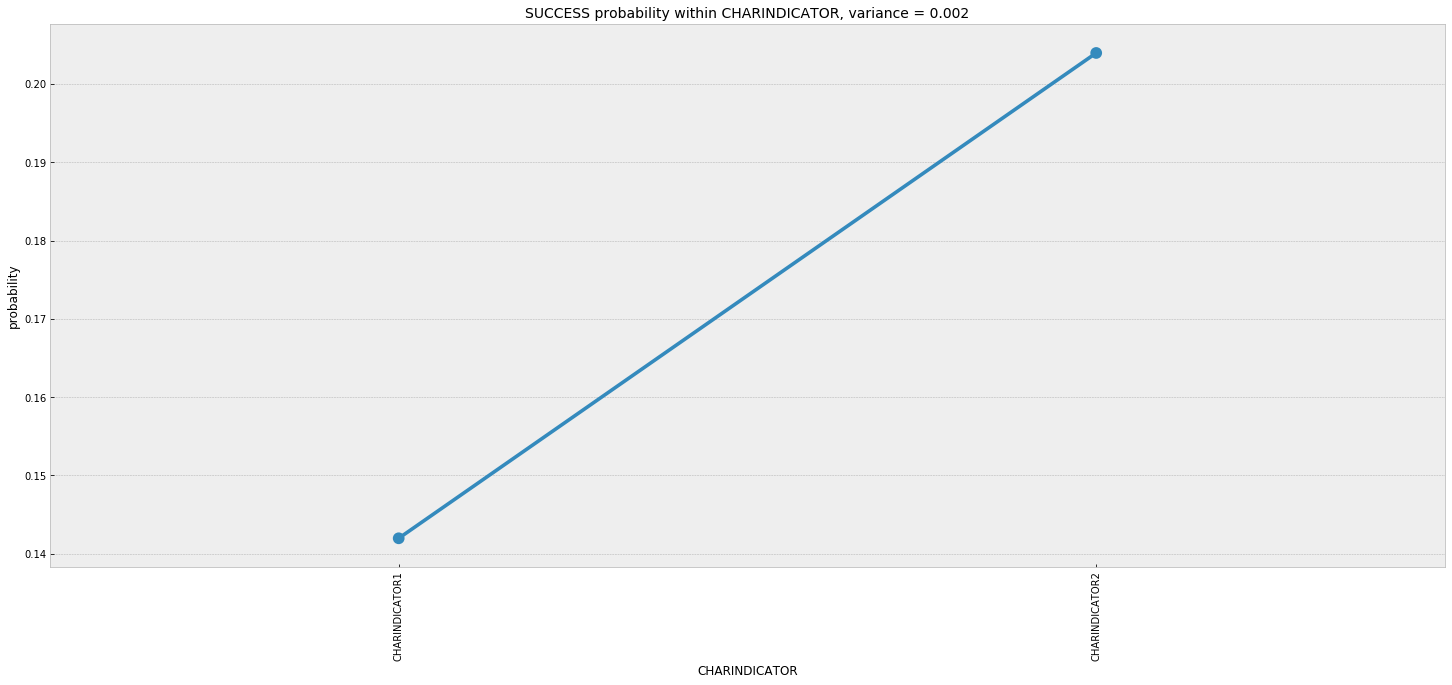

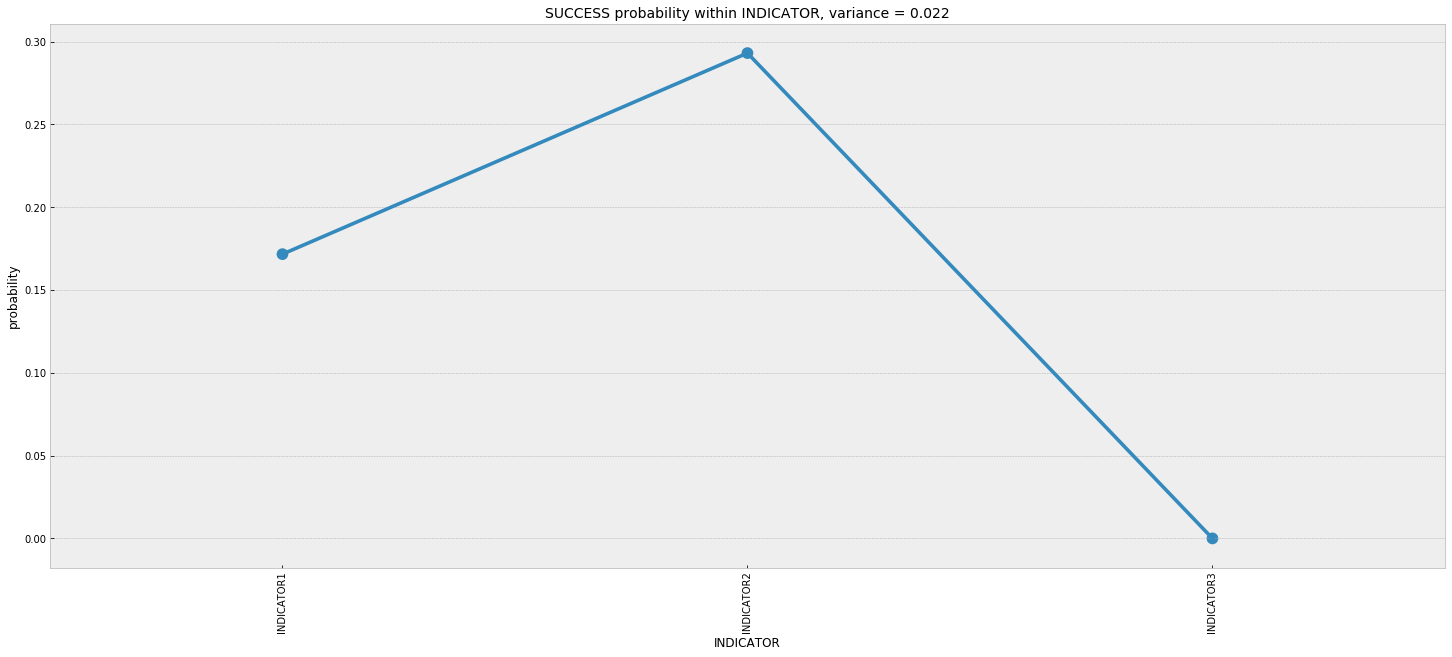

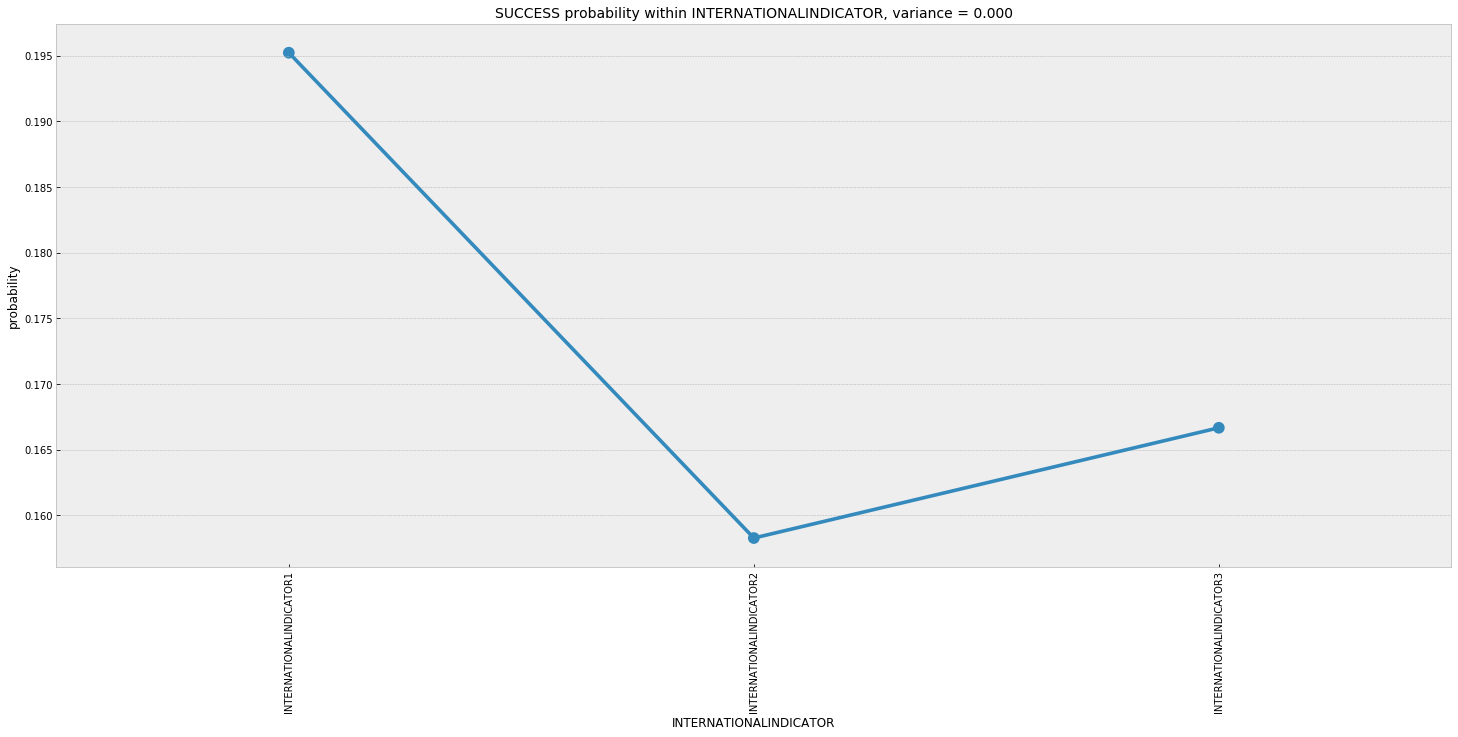

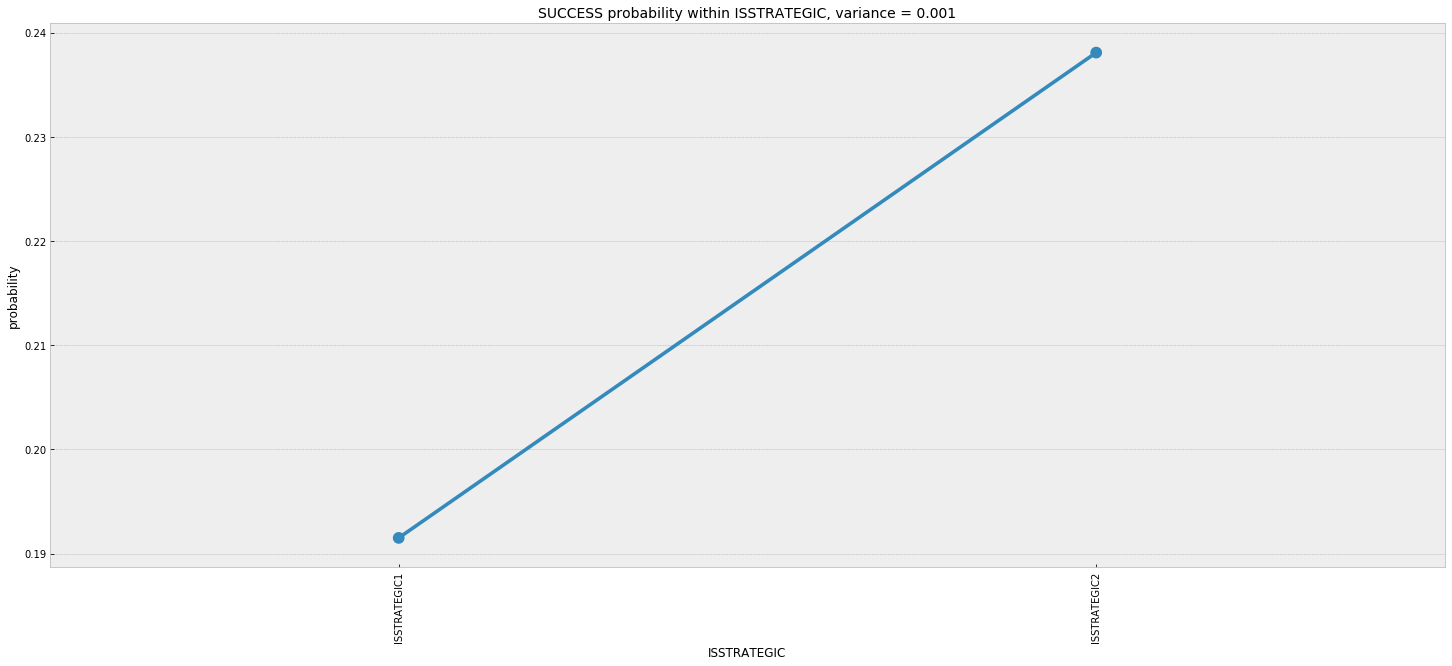

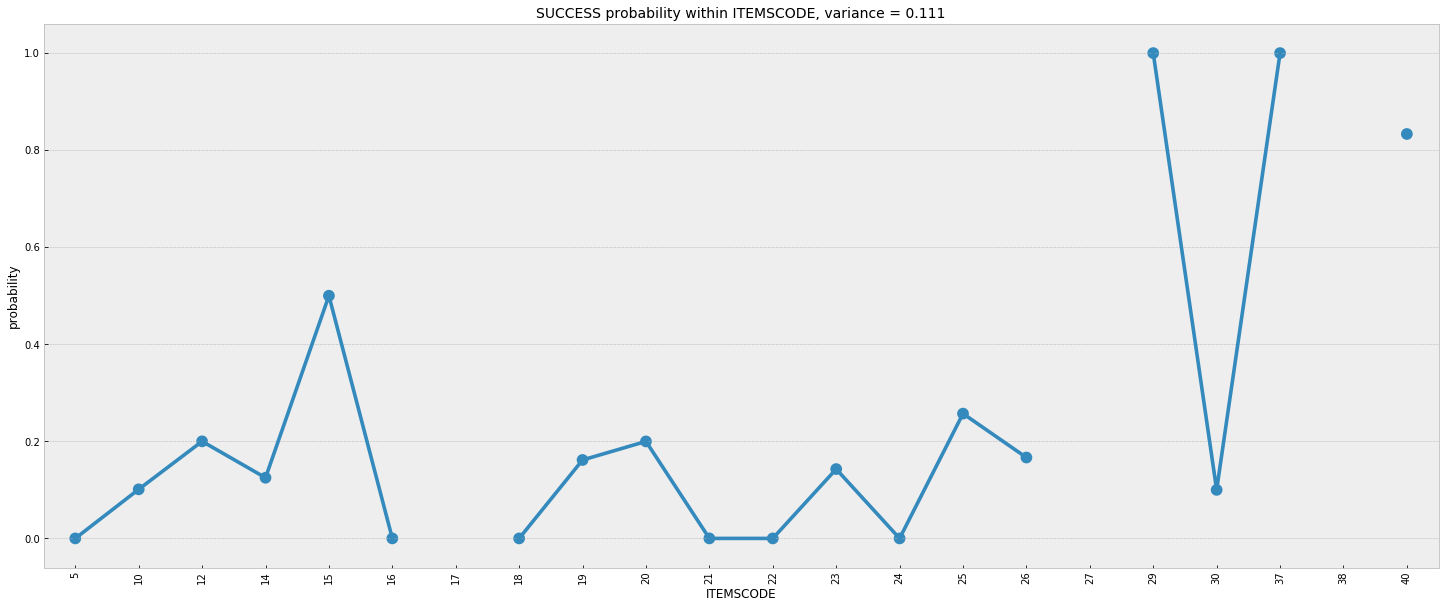

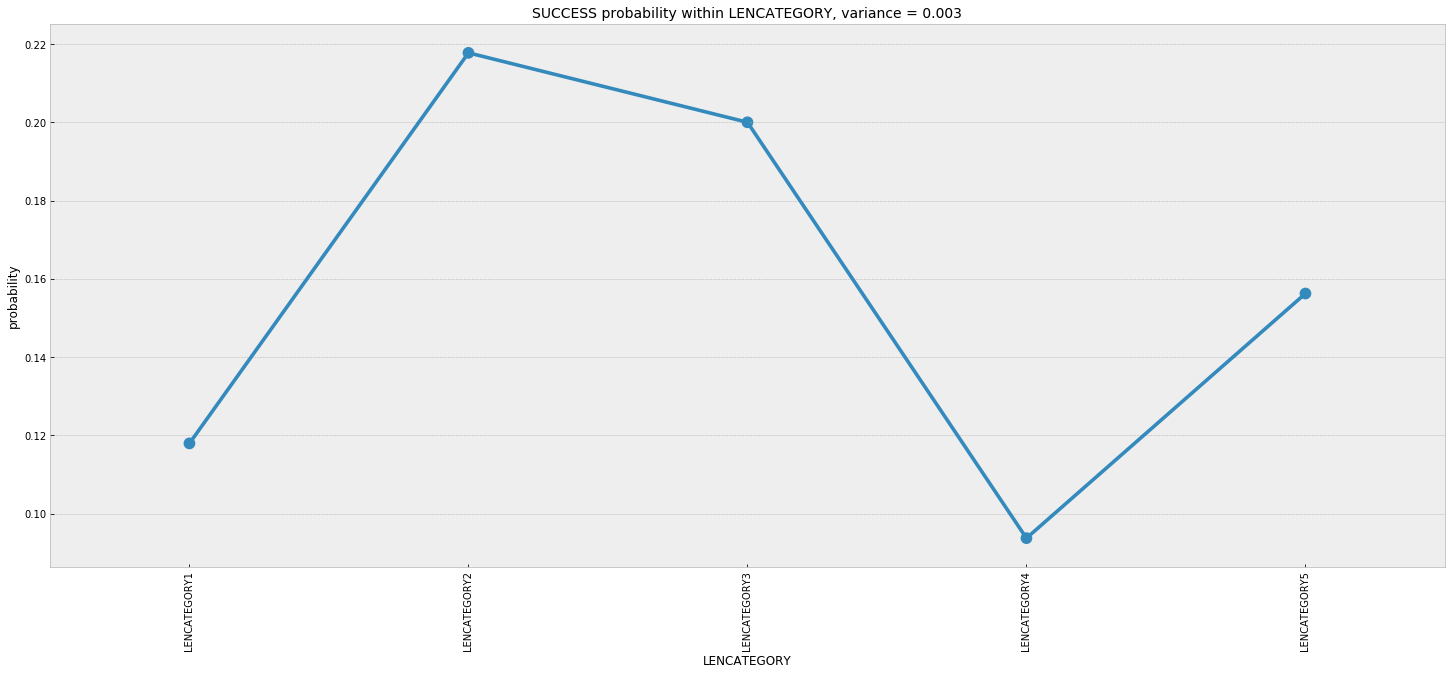

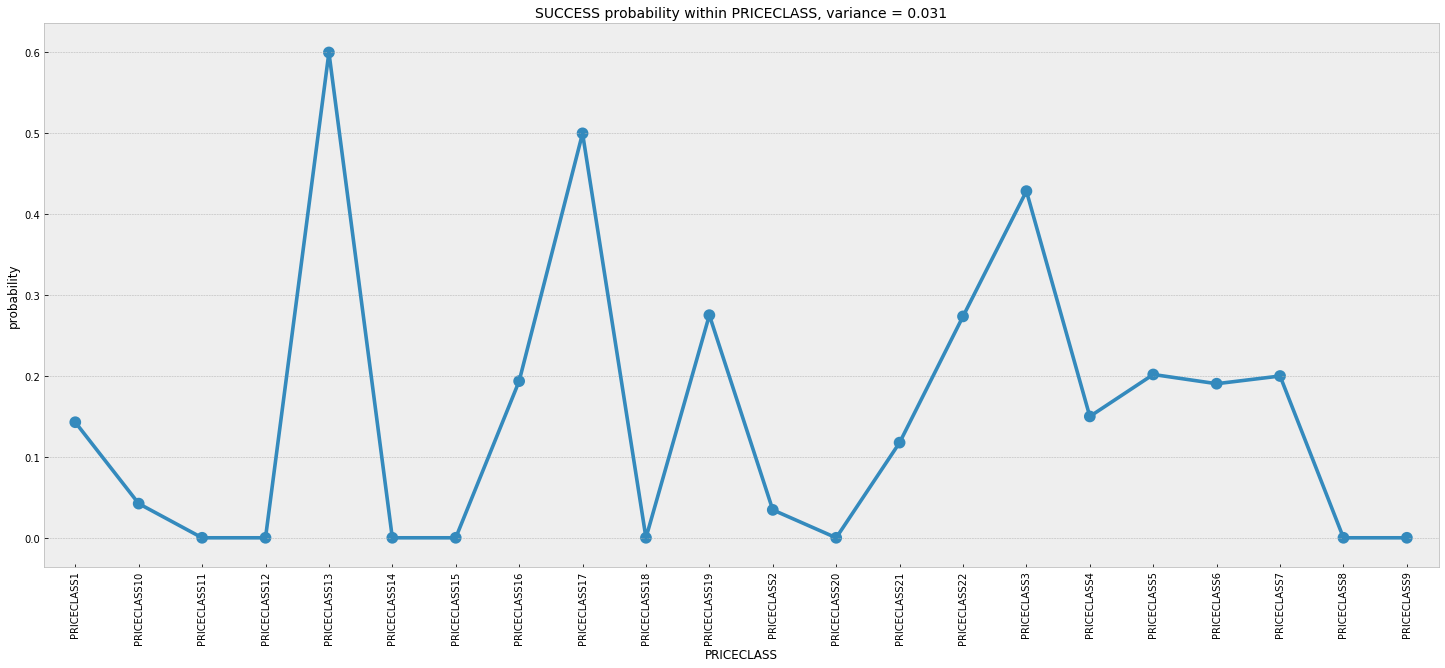

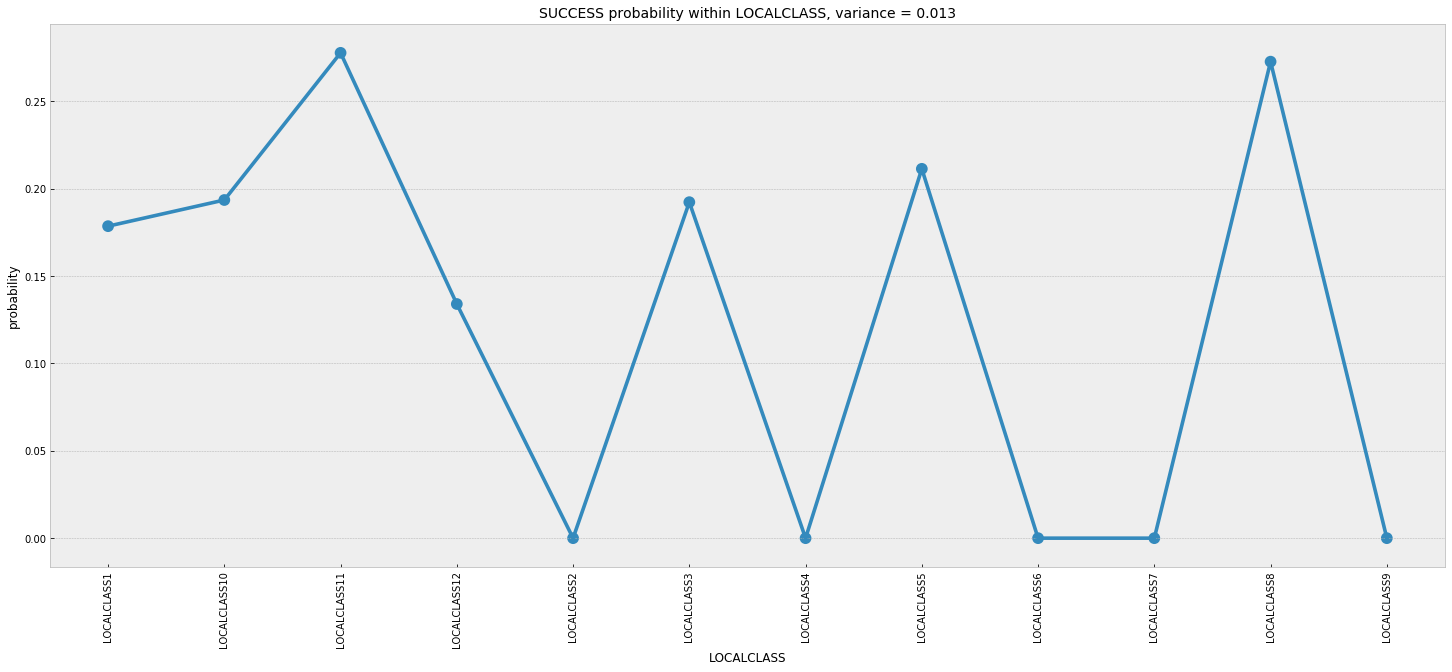

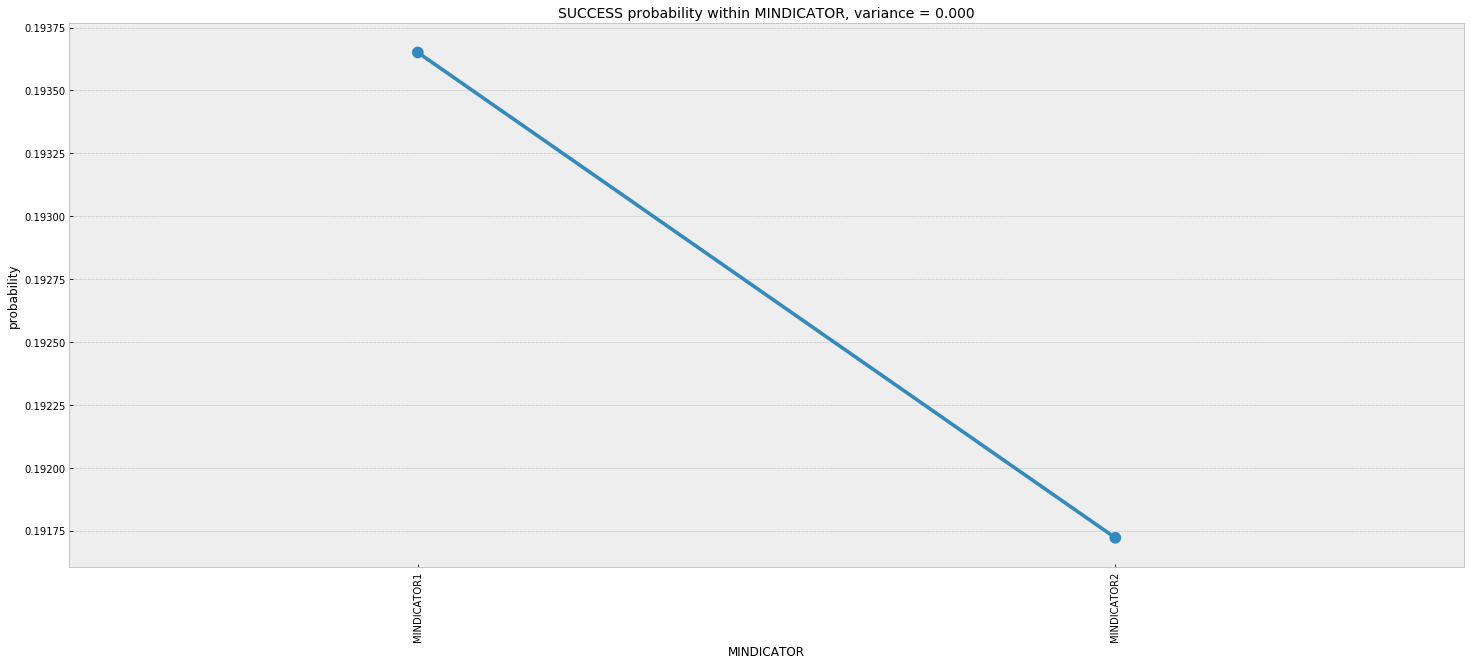

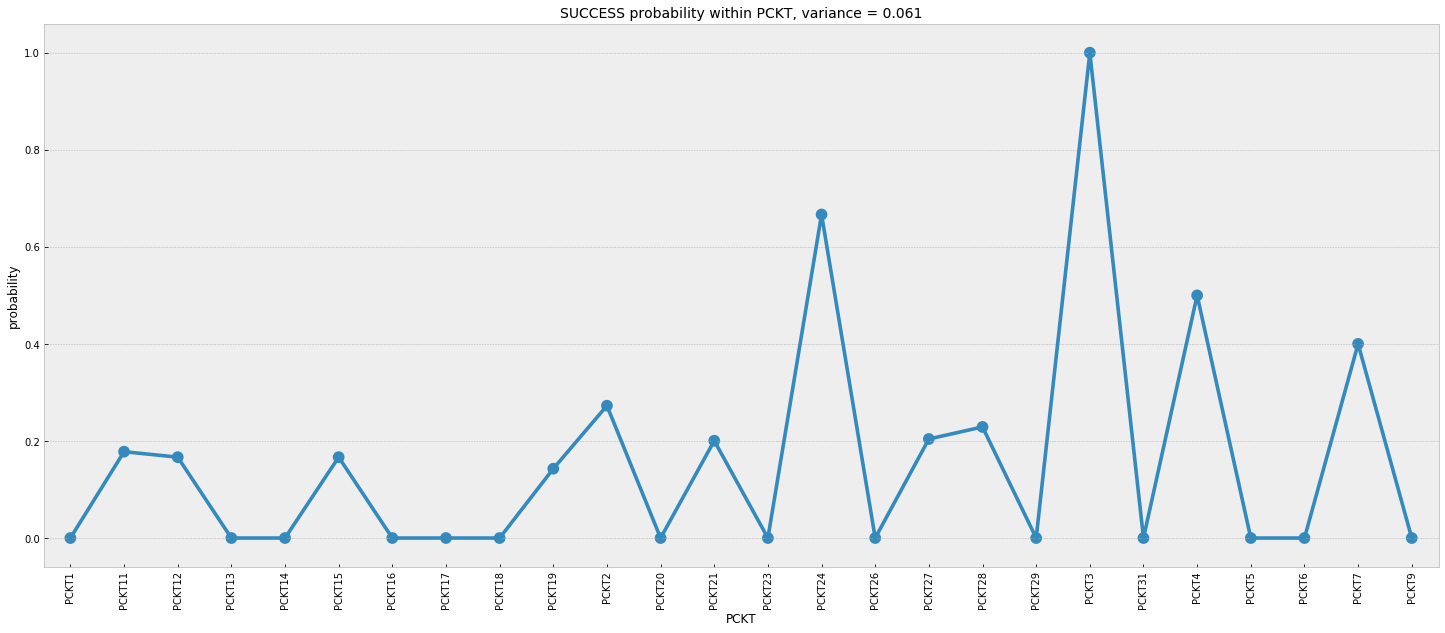

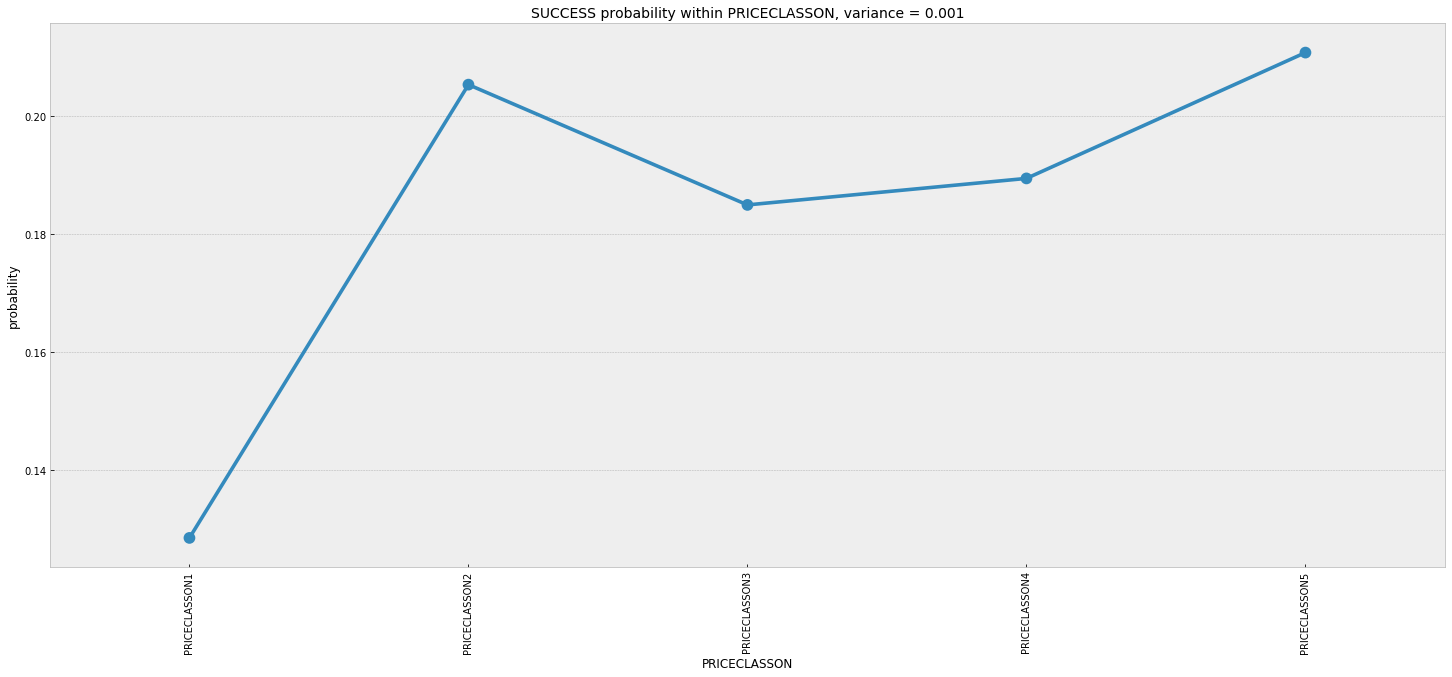

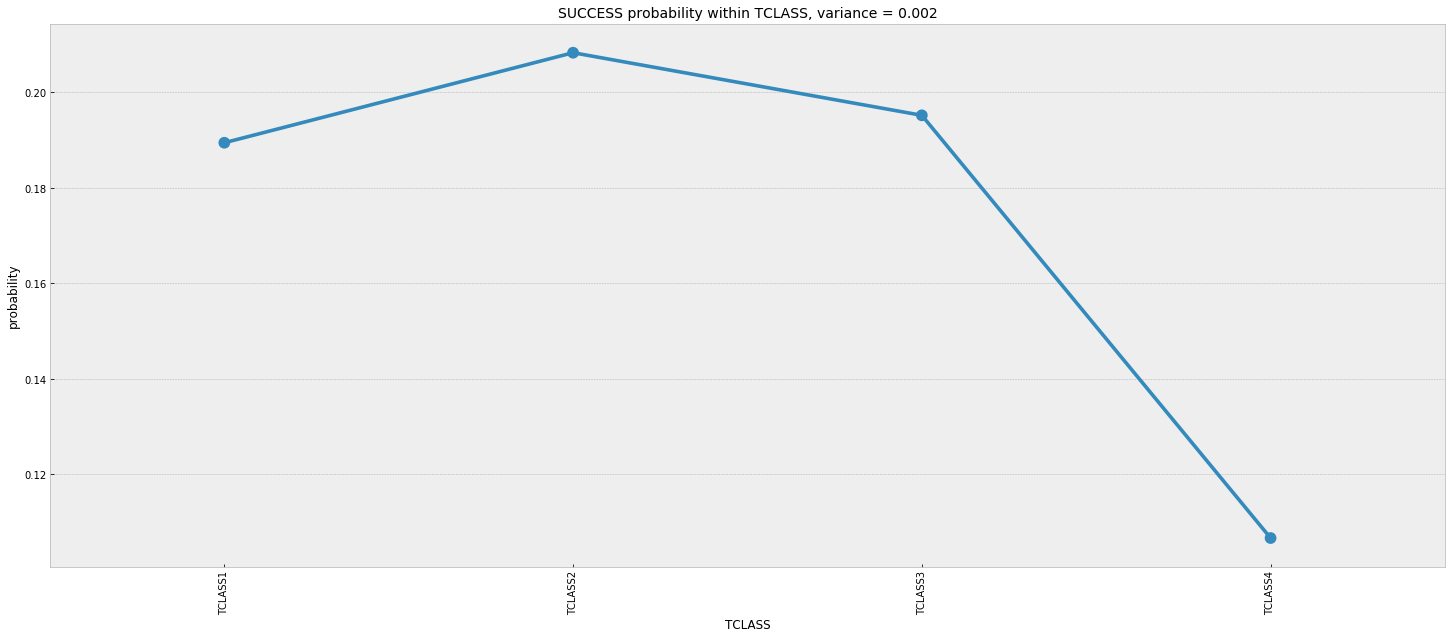

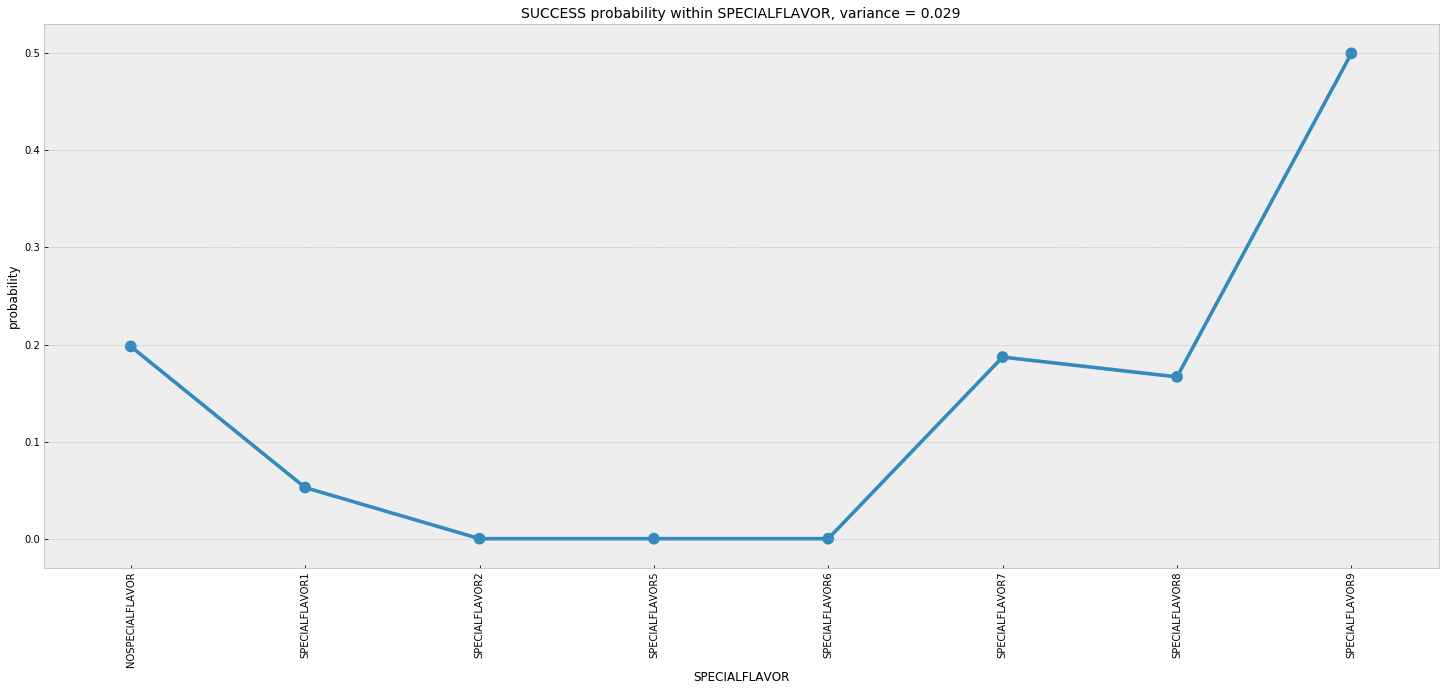

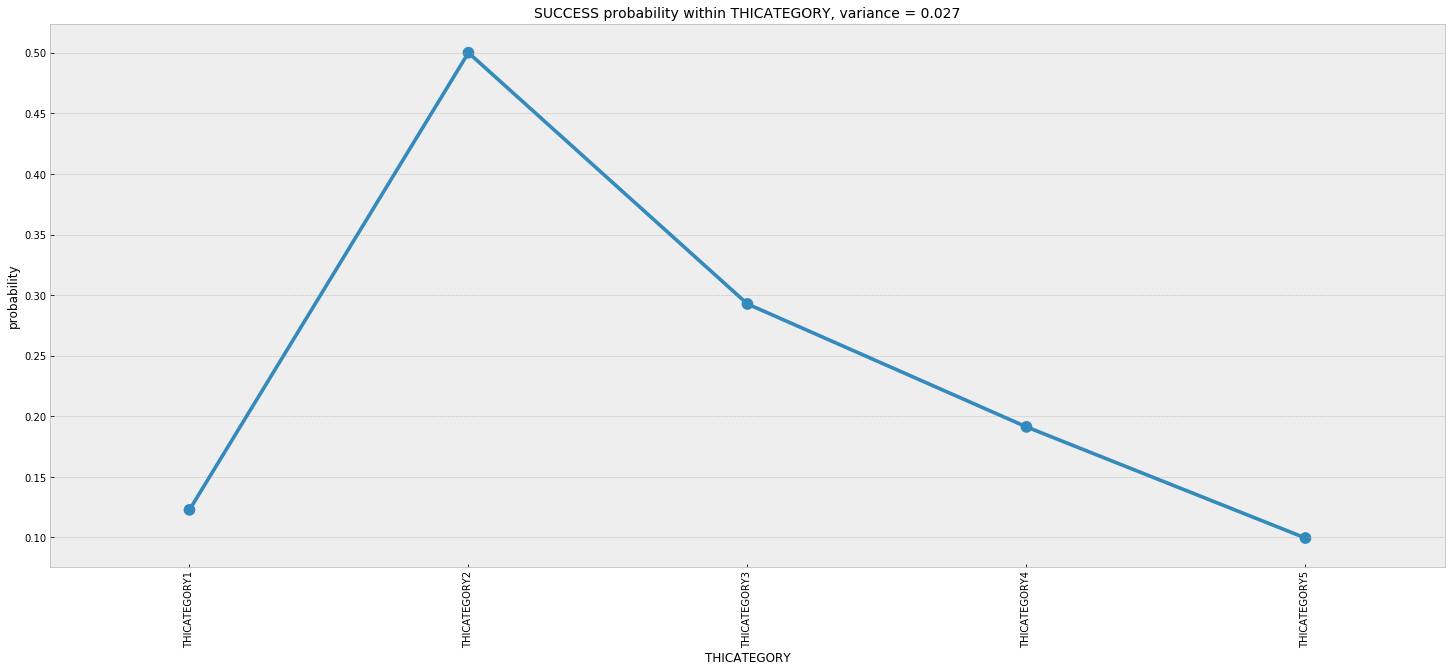

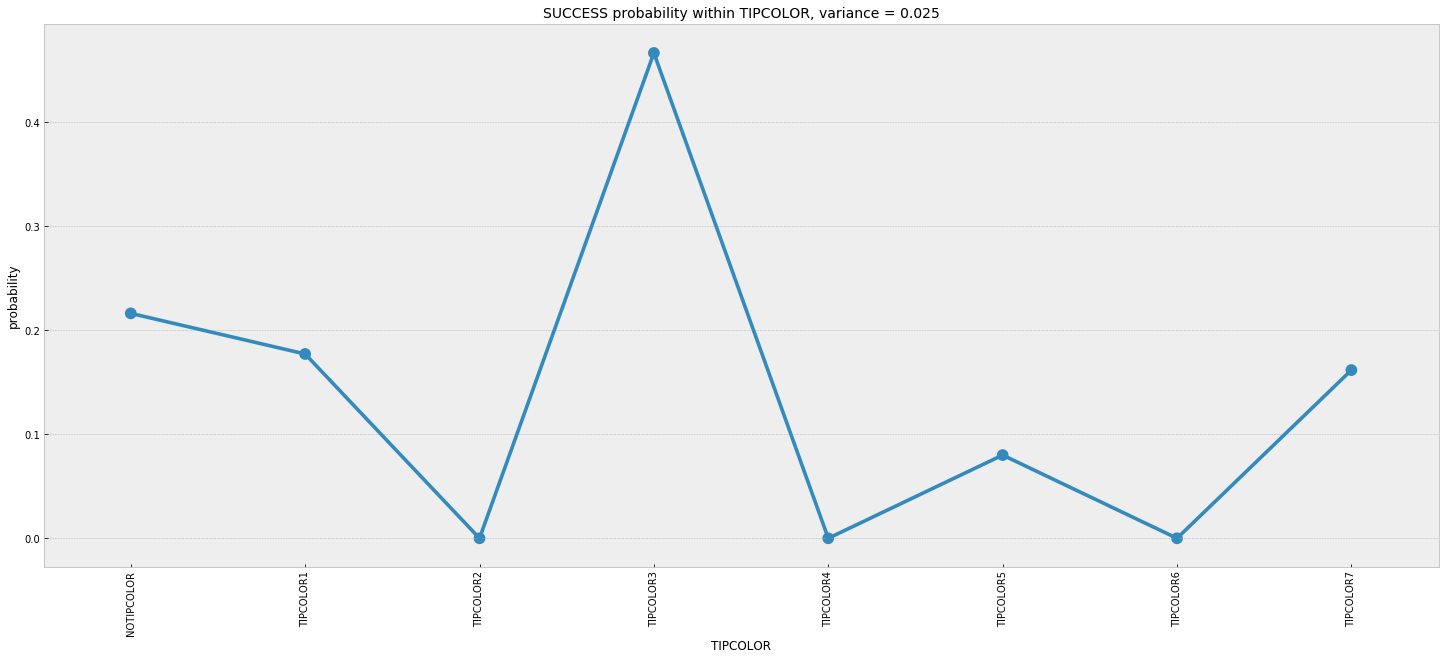

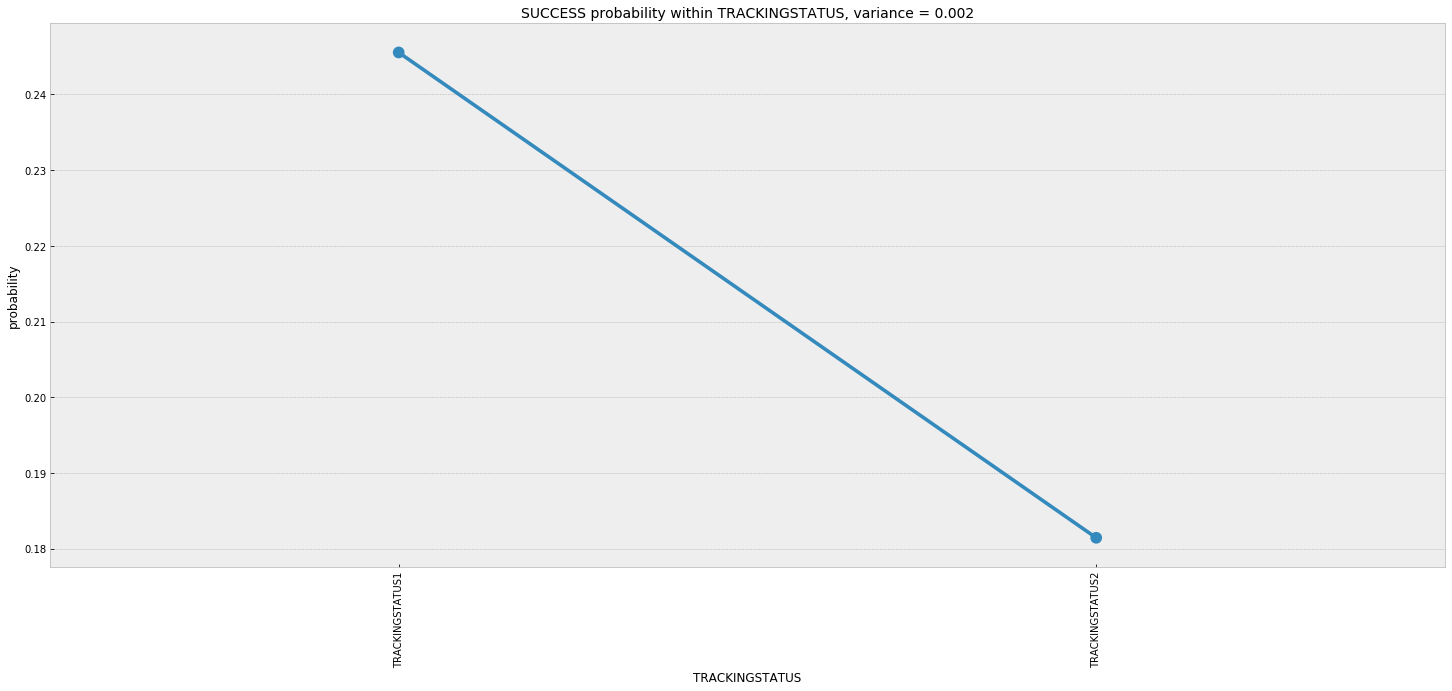

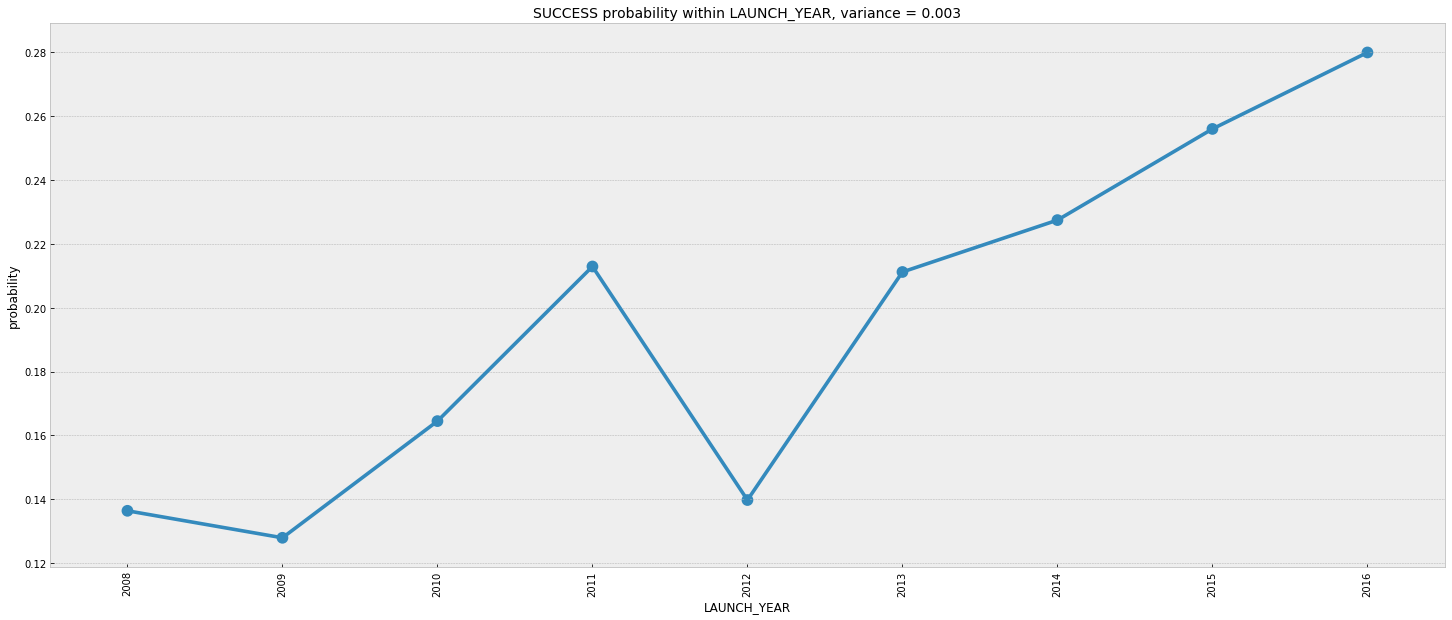

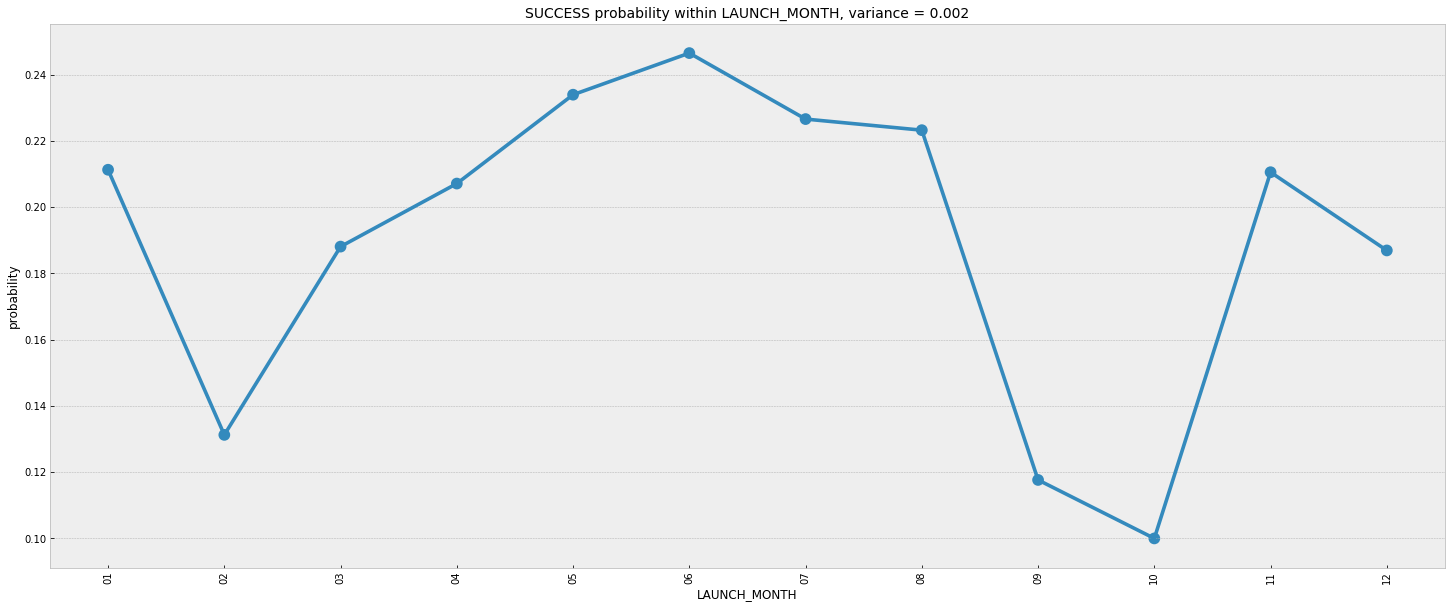

In [50]:
for column in df_cat.columns[:-2]:
    plot_success_probability(column)

Based on these graphs we can assume that our final result is very sensitive to the threshold - 0.7%.

In [51]:
del df_cat, df

### Summary

*  We have 31 features, 4 numerical and 27 categorical.

*  Our response variable - **Market Share** is transformed with **BoxCox (lambda=0.25)** and now its shape is like normal distribution shape.
* Numeric features **RETAILPACKPRICE', 'NCON', 'LEN'** are transformed with **BoxCox1p (lambda=-0.25)**, in order to have less skew.
* There is no strong linear correlation between response variable and numerical features.
* **SPECIALFLAVOR** missed values are filled with **NOSPECIALFLAVOR** (as a new category)
* **TIPCOLOR**  missed values are filled with **NOTIPCOLOR** (as a new category)
* For different reasons we willnot use the following features: 'BRMID', 'LATESTPERIODINDEX', 'NPLLAUNCHDATE', 'ISREPLACEMENT', 'BRM', 'MARKETEDBRAND','BRANDSUBFAMILY', 'NPLLAUNCHYEAR', 'RTYPE', 'ITEMSHAPE'.